# Table of Contents

1. [Introduction](#1_introduction)<br>
2. [Features](#2_features)<br>
3. [Requirements](#3_requirements)<br>
4. [Usage](#4_usage)<br>
5. [Code Quality Metrics](#5_code_quality_metrics)<br>
   5.1 [Function-level metrics](#5.1_function_level_metrics)<br>
   5.2 [Application/Class-level metrics](#5.2_class_level_metrics)<br>
6. [Custom analysis (PETSc example)](#6_custom_analysis)<br>
7. [Examples](#examples)<br>
   7.1 [Function-level metric examples](#7.1_function_level_examples)<br>
   &nbsp;&nbsp;a) Toy Example  <br>
   &nbsp;&nbsp;b) PETSc example<br>
   &nbsp;&nbsp;c) SLEPc example<br>
   &nbsp;&nbsp;d) HYPRE example<br>
   &nbsp;&nbsp;e) SuperLU example<br>
   7.2 [Application/Class-level metric examples](#7.2_class_level_examples)<br>
   &nbsp;&nbsp;a) Toy Example<br>
   &nbsp;&nbsp;b) PETSc example<br>
   &nbsp;&nbsp;c) SLEPc example<br>
   &nbsp;&nbsp;d) HYPRE example<br>
   &nbsp;&nbsp;e) SuperLU example<br>

## 1. Introduction

The dynamic analyzer tool uses the libClang API to analyze dynamic
aspects of C language programs. LibClang is a stable high-level C interface to Clang that
provides a *cursor* abstraction to enable various checks and
actions to be implemented based on traversing the program's abstract
syntax tree.

## 2. Features

This tool can be used to obtain the following information from the code.

* Descriptive characteristics of an application and its functions such as name, mangled name and qualified name, definition, and location of functions and its calling references.
* Method-level metrics of each function of an application, such as
Cyclomatic Complexity, Space Complexity in terms of identifiers and literals usage.
* Application-level metrics, such as WMA (Weighted Method per Application), Cyclomatic Complexity and
Space Complexity in terms of identifiers and literal usage.

The tools can also be extended to check conformance with custom rules,
typically expressing naming convention or language usage constraints.

## 3. Requirements

* [LLVM (v. 11 or 12)](https://llvm.org/)
* [Clang](https://clang.llvm.org/get_started.html)
* Python (supports both Python 2 and 3)
* Conda (e.g., [Miniconda 3](https://docs.conda.io/en/latest/miniconda.html))
* Linux or MacOS

(A containerized distribution will be made available in August, 2021)


## 4. Usage

After cloning this repository, go to the `code-analysis` subdirectory
and apply the `environments.yml` file as follows.

    cd code-analysis
    conda env create –f environments.yml


## 5. Code quality metrics

### 5.1 Function level metrics

The aim of these software metrics is to evaluate the functional and space of a
function/method of an application/class. The list and brief description of these
software metrics is as follows.

#### a) Cyclomatic Complexity (CC)

CC is a derived, graph-based metric of function complexity, which combines the number of
control flow graph edges (E) and the number of nodes (N) as follows.

$CC(G)=E-N+2$

**Implications.** High CC values are undesirable, because they can negatively impact the
the readability of a method/function, testing difficulty and ultimate reliability.

Each project may adopt their own threshold values for CC to decide when to require
refactoring, but some good rules of thumb thresholds are outlined below.

* 1-10 (Simple, low complexity) --> Good
* 11-20 (Moderate risk) --> Bad
* 21-50 (High Risk) --> Too complex, consider refactoring
* \> 50 (Not testable) –->Too complex, must be refactored

#### b) Fan-In

Fan-in is a direct metric, which expresses the inter-module complexity of an application.
It measures the number of functions or methods that call some other function or method.
It is computed as a call graph-based metric.

**Implications.** Fan-In is used to express how difficult it would be to replace a function or module in
your application and how changes to a function or module can impact other functions or modules.gh
Higher values correspond to greater amounts of effort that may be required in refactoring.

#### c) Fan-Out

Fan-Out is a direct structural metric, which measures the inter-module complexity of an
application. It computes the number of functions that are called by some function X.
It is computed as a call graph-based metric.

**Implications.**  This metric represents potential module instability
and its ripple effect on other modules (e.g., functions).

#### d) Number of Attributes (NOA)

NOA is a direct measure that describes the total number of identifiers in a
method/function of a class/application.

**Implications.** This metrics could be used to identify the space complexity of a 
function/method.

### 5.2 Class level metrics

The aim of these software metrics is to evaluate the functional, data control and
method call control complexities of an application. Here we include
brief descriptions of these software quality metrics and their implications.

#### a) Avg Fan-In (AFI)

AFI is a derived measure. It refers to the average value of Fan-In and present the average inter-procedural complexity at application level.

$AFI=\frac{\sum \limits _{i=1}^{N} {Fin}_i}{N}$,

where N represents the number of methods/functions in a class/application.

**Implications.** Same implications as of Fan-In but this value is referring to an avergae value and can lead to identify the inter-proecedural complexity of an application.

#### b) Avg Fan-Out (AFO)

AFO is a derived measure. It refers to the average value of Fin-Out and present the average inter-procedural complexity at application level.

$AFO=\frac{\sum \limits _{i=1}^{N} {Fout}_i}{N}$,   Where N present the number of methods/functions in a class/application 

**Implications.** Same implications as of Fanout but this value is referring to an avaergae value and can lead to identify the inter-proecedural complexity of an application.

#### c) Weighted Method per Application (WMA)

It is a derived measure. Like WMC, which indicate a collective sum of complexity (either CC, Halsteed volum) of all methods of a class, WMA also indicate the collective sum of CC of all.

$WMA= \sum \limits _{i=1}^{N} {CC}_i$,

where N present the number of methods/functions in a class/application

**Implications.** WMA is propotional to the time and effort that would be required
to develop and maintain the class.

Example threshold values: Lower Limit = 1, Upper Limit = 50

#### d) Number Of Methods (NOM)

NOM is a direct measure. It describes the total number of methods/functions in a class/application.

**Implications.** NOM cannot be viewed as an indicator of the effort, but it could indicate the distribution of functionality and can indicate the existence of good method design smel

Example threshold values:    Low: 4, Average : 9, High: 15

#### e) Chepin's Metric (Q)

This metric describes the information strength of a method/Function. It uses for variable as follows,             a. P (input variable and an output variable),                                                                       b. M (Modified or created inside the function/method) variables,                                                   c. C : Control variables (such as used in conditions and loops)                                                  
d. T: (Parasite variable, which is not used in the function

$Q={a}_1P+{a}_2M+{a}_3C+{a}_4T$,   Where ${a}_1=1, {a}_2=2, {a}_3=3 and {a}_4=0.5$

**Implications.** Higher Q values correspond to increased difficulties in generating test cases and
hence reduced robustness.

## 7.1 Function level examples

The aim of this analysis is to compute different quality metrics at the function level.
Function-level analysis uses the Python bindings to the libclang library, which operates on
the Clang abstract syntax tree (AST) program representation.

We used the several cursor types (in terms of AST) of libclang to perform this analysis.
The main script traverses each function of a target application (*.c/*.cpp/*.h)
and does the following.

1. Identifies the definition and location of each function.
2. Extracts identifiers and literals from each function.
3. Computes the Cyclomatic Complexity of each function.
4. Finds the fully-qualified name, namespace (if properly documented) and mangled name of each function.

## 7 Examples

In all examples below, replace `/home/user` with the full path where you cloned this 
(`xsdk-code-quality`) repository.

### Main Script 

In [1]:
import csv, os, glob
import sys
import clang.cindex


# A function to read a file and record it as an array
def File_to_Array(file_name):
    with open(file_name) as file:
        for line in file:
            File_Content_Array.append(line)


# A function used to extract identifiers and literals
def Extract_Identifiers(File_Name):
    Identifiers = []
    idx = clang.cindex.Index.create()
    tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
    filename = tu.cursor.spelling
    for c in tu.cursor.walk_preorder():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.CursorKind.VAR_DECL or c.kind == clang.cindex.CursorKind.PARM_DECL or c.kind == clang.cindex.CursorKind.DECL_REF_EXPR:
            if c.spelling != "" and c.spelling not in Function_List:
                col = []
                col.append(c.spelling)
                # print (c.spelling, c.kind, c.location)
                if col not in Identifiers:
                    Identifiers.append(col)
    return Identifiers


# A function used to extract the idenitifers and literals from an application
def Extract_Identifiers_Literals(tu):
    cnt = 0
    filename = tu.cursor.spelling
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif (
                c.cursor.kind == clang.cindex.CursorKind.FUNCTION_DECL or c.cursor.kind == clang.cindex.CursorKind.FUNCTION_TEMPLATE) and c.spelling in Function_List:
            cnt = cnt + 1
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Function_List:
            temp = Function_Identifiers[cnt - 1]
            temp = temp + 1
            Function_Identifiers[cnt - 1] = temp
        elif c.kind == clang.cindex.TokenKind.LITERAL:
            temp = Function_Literals[cnt - 1]
            temp = temp + 1
            Function_Literals[cnt - 1] = temp


# A function used to compute the cyclmatic complexity of a function
def Extract_Function_Complexity(tu):
    cnt = 0
    flag = False
    filename = tu.cursor.spelling
    fn = ""
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        else:
            if (
                    c.cursor.kind == clang.cindex.CursorKind.FUNCTION_DECL or c.cursor.kind == clang.cindex.CursorKind.FUNCTION_TEMPLATE) and c.spelling in Function_List:
                flag = True
                fn = c.spelling
                cnt = cnt + 1
            if c.spelling in CC_Keywords and (cnt <= len(Function_Complexity) and Function_List[
                cnt - 1] == fn):  # and len(Function_List)==len(Function_Complexity)):
                temp = Function_Complexity[cnt - 1]
                temp = temp + 1
                Function_Complexity[cnt - 1] = temp


# A function used to extract the line and column number of a function definition
def Extract_Line_Column(cursor):
    x = str(cursor.location)
    y = x.split(',')
    line = y[1]
    column = y[2]
    line = line.split()
    line = line[1]
    column = column.split()
    column = column[1]
    return line, column


# A function used to extract the qualified name of a function
def Extract_Function_Qualified_Name(cursor):
    if cursor is None:
        return ''
    elif cursor.kind == clang.cindex.CursorKind.TRANSLATION_UNIT:
        return ''
    else:
        res = Extract_Function_Qualified_Name(cursor.semantic_parent)
        if res != '':
            return res + '::' + cursor.spelling
    return cursor.spelling


# A function used to merge the all recorded information about a function
def Merge_Function_Information(Functions, Complexity, Identifiers, literals):
    Final_List = []
    # Heading row for the list of functions
    col = []
    col.append("File Name")
    col.append("Function Name")
    col.append("Function Qualified Name")
    col.append("Mangled Name")
    col.append("Name Space")
    col.append("Function Definition")
    col.append("Line Number")
    col.append("Column Number")
    col.append("Cyclomatic Complexity")
    col.append("Total_Identifiers")
    col.append("Total_Literals")
    Final_List.append(col)
    cnt = 0
    for func in Functions:
        col = []
        col.append(func[0])
        col.append(func[1])
        col.append(func[2])
        col.append(func[3])
        col.append(func[4])
        col.append(func[5])
        col.append(func[6])
        col.append(func[7])
        col.append(Complexity[cnt])
        col.append(Identifiers[cnt])
        col.append(literals[cnt])
        Final_List.append(col)
        cnt = cnt + 1
    return Final_List


def Extract_Functions(file_name, tu, Keywords, Identifiers):
    Name_Space = "Anonymous NameSpace"
    File_to_Array(file_name)
    filename = tu.cursor.spelling
    for c in tu.cursor.walk_preorder():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.CursorKind.NAMESPACE:
            Name_Space = c.spelling
        elif c.kind == clang.cindex.CursorKind.FUNCTION_DECL or c.kind == clang.cindex.CursorKind.CXX_METHOD or c.kind == clang.cindex.CursorKind.FUNCTION_TEMPLATE:
            lin1, col1 = Extract_Line_Column(c)
            col1 = col1[:-1]
            st = File_Content_Array[int(lin1) - 1]
            col = []
            col.append(file_name)
            col.append(c.spelling)
            col.append(Extract_Function_Qualified_Name(c))
            col.append(c.mangled_name)
            col.append(Name_Space)
            col.append(st.strip())
            col.append(lin1)
            col.append(col1)
            List_of_Functions.append(col)
            Function_List.append(c.spelling)
            Function_Complexity.append(1)
            Function_Identifiers.append(0)
            Function_Literals.append(0)
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Keywords and c.spelling not in Identifiers:  # c.spelling.lower() not in Keywords2 and c.spelling.lower() not in Keywords1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            Tokens = st.split()
            Token_Index = -1
            for f in range(len(Tokens)):
                if Tokens[f] == c.spelling:
                    Token_Index = f
            Ident_Index = st.find(c.spelling)
            Paren_Index = st.find("(")
            #print (c.spelling, ident_lin, st, len(Tokens))
            #print (Tokens[0],Tokens[0].lower().count("petsc"), Token_Index, st.count("()"), st.count(")"), Ident_Index, Paren_Index, st) 
            if len(Tokens) > 1:
                if (Tokens[0] in Keywords or Tokens[0].lower().count("petsc") != 0) and st.count(";") != 0 and st.count(
                        "=") == 0 and Token_Index > 0 and st.count("(") != 0 and st.count(
                        ")") != 0 and Ident_Index < Paren_Index:
                    lin1, col1 = Extract_Line_Column(c)
                    col1 = col1[:-1]
                    st = File_Content_Array[int(lin1) - 1]
                    col = []
                    col.append(file_name)
                    col.append(c.spelling)
                    col.append("NA")
                    col.append("NA")
                    col.append(Name_Space)
                    col.append(st.strip())
                    col.append(lin1)
                    col.append(col1)
                    List_of_Functions.append(col)
                    Function_List.append(c.spelling)
                    Function_Complexity.append(1)
                    Function_Identifiers.append(0)
                    Function_Literals.append(0)

    Extract_Function_Complexity(tu)
    Extract_Identifiers_Literals(tu)
    Final_List = Merge_Function_Information(List_of_Functions, Function_Complexity, Function_Identifiers,
                                            Function_Literals)
    return Final_List


### a) Toy Example 

The file example2.c could be accessed from `code-analysis/sandbox/dynamic/tests` directory.

In [2]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib') # Replace with your path

# Declaration and Inititialzation of lists
File_Content_Array = []
Function_Complexity = []
List_of_Functions = []
Function_List = []
Function_Identifiers = []
Function_Literals = []
Cursor_Types = {clang.cindex.CursorKind.IF_STMT, clang.cindex.CursorKind.WHILE_STMT, clang.cindex.CursorKind.FOR_STMT,
                clang.cindex.CursorKind.DEFAULT_STMT, clang.cindex.CursorKind.CASE_STMT,
                clang.cindex.CursorKind.COMPOUND_STMT}
CC_Keywords = {"if", "case", "default", "for", "while", "else"}

path = "/home/user/xsdk-code-quality/code-analysis/dynamic/tests"
File_Name = path + "/" + "example2.c"

Keywords = ['if', 'for', 'while', 'default', 'do', 'void', 'switch', 'int', 'float', 'double', 'char', 'string',
            'printf', 'scanf', 'cin', 'cout']
Identifiers = Extract_Identifiers(File_Name)

idx = clang.cindex.Index.create()
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
Function_Metrics = Extract_Functions(File_Name, tu, Keywords, Identifiers)

Function_Metrics_List = []
for f in Function_Metrics:
    if f[9] != 0 and f[10] != 0:
        Function_Metrics_List.append(f)

columns = ['File Name', 'Function Name', 'Function Qualified Name', 'Mangled Name', 'Name Space', 'Function Definition',
           'Line Number', 'Column Number', 'Cyclomatic Complexity', 'Total Identifiers (NOA)', 'Total Literals']
Data_Frame = pd.DataFrame.from_records(data=Function_Metrics_List, columns=columns)
display(Data_Frame)


,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total Identifiers (NOA),Total Literals
0,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total_Identifiers,Total_Literals
1,/Users/shussain/code-analysis/dynamic/tests/ex...,Large,Large,__Z5Largeii,Anonymous NameSpace,"void Large(int a, int b)",1,6,3,8,2
2,/Users/shussain/code-analysis/dynamic/tests/ex...,main,main,_main,Anonymous NameSpace,void main() {,9,6,3,9,6


### b) PETSc Example

Before you can run this example, make sure to download and configure a copy of [PETSc](https://petsc.org).

The file `ex5.c` is in the `petsc-3.14.3/src/snes/tutorials` directory.

In [3]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'

# Declaration and Inititialzation of lists
File_Content_Array = []
Function_Complexity = []
List_of_Functions = []
Function_List = []
Function_Identifiers = []
Function_Literals = []
Cursor_Types = {clang.cindex.CursorKind.IF_STMT, clang.cindex.CursorKind.WHILE_STMT, clang.cindex.CursorKind.FOR_STMT,
                clang.cindex.CursorKind.DEFAULT_STMT, clang.cindex.CursorKind.CASE_STMT,
                clang.cindex.CursorKind.COMPOUND_STMT}
CC_Keywords = {"if", "case", "default", "for", "while", "else"}

path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
#path="/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/include"
File_Name = path + "/" + "ex5.c"

Keywords = []
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

Identifiers = Extract_Identifiers(File_Name)
idx = clang.cindex.Index.create()
#os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/tests")
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
Function_Metrics = Extract_Functions(File_Name, tu, Keywords, Identifiers)

Function_Metrics_List = []
for f in Function_Metrics:
    if f[9] != 0 and f[10] != 0:
        Function_Metrics_List.append(f)

columns = ['File Name', 'Function Name', 'Function Qualified Name', 'Mangled Name', 'Name Space', 'Function Definition',
           'Line Number', 'Column Number', 'Cyclomatic Complexity', 'Total Identifiers (NOA)', 'Total Literals']
Data_Frame = pd.DataFrame.from_records(data=Function_Metrics_List, columns=columns)
display(Data_Frame)



,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total Identifiers (NOA),Total Literals
0,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total_Identifiers,Total_Literals
1,/Users/shussain/code-analysis/dynamic/Projects...,main,main,_main,Anonymous NameSpace,"int main(int argc,char **argv)",92,5,16,427,44
2,/Users/shussain/code-analysis/dynamic/Projects...,FormInitialGuess,FormInitialGuess,__Z16FormInitialGuessiP6AppCtxi,Anonymous NameSpace,"PetscErrorCode FormInitialGuess(DM da,AppCtx *...",248,16,5,124,13
3,/Users/shussain/code-analysis/dynamic/Projects...,FormExactSolution,FormExactSolution,__Z17FormExactSolutioniP6AppCtxi,Anonymous NameSpace,"PetscErrorCode FormExactSolution(DM da, AppCtx...",312,16,3,98,1
4,/Users/shussain/code-analysis/dynamic/Projects...,ZeroBCSolution,ZeroBCSolution,__Z14ZeroBCSolutionP6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode ZeroBCSolution(AppCtx *user,con...",337,16,1,8,3
5,/Users/shussain/code-analysis/dynamic/Projects...,MMSSolution1,MMSSolution1,__Z12MMSSolution1P6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode MMSSolution1(AppCtx *user,const...",349,16,1,22,5
6,/Users/shussain/code-analysis/dynamic/Projects...,MMSForcing1,MMSForcing1,__Z11MMSForcing1P6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode MMSForcing1(AppCtx *user,const ...",356,16,1,28,8
7,/Users/shussain/code-analysis/dynamic/Projects...,MMSSolution2,MMSSolution2,__Z12MMSSolution2P6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode MMSSolution2(AppCtx *user,const...",363,16,1,24,3
8,/Users/shussain/code-analysis/dynamic/Projects...,MMSForcing2,MMSForcing2,__Z11MMSForcing2P6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode MMSForcing2(AppCtx *user,const ...",370,16,1,34,3
9,/Users/shussain/code-analysis/dynamic/Projects...,MMSSolution3,MMSSolution3,__Z12MMSSolution3P6AppCtxPKiPi,Anonymous NameSpace,"PetscErrorCode MMSSolution3(AppCtx *user,const...",377,16,1,30,5


### c) SLEPc Example

First, download and configure [SLEPc](https://slepc.upv.es/).

The file `ex5.c` can be found in the `slepc-Firedrake_20210413.0/src/eps/tutorials` directory.

In [4]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

# Declaration and Inititialzation of lists
File_Content_Array = []
Function_Complexity = []
List_of_Functions = []
Function_List = []
Function_Identifiers = []
Function_Literals = []
Cursor_Types = {clang.cindex.CursorKind.IF_STMT, clang.cindex.CursorKind.WHILE_STMT, clang.cindex.CursorKind.FOR_STMT,
                clang.cindex.CursorKind.DEFAULT_STMT, clang.cindex.CursorKind.CASE_STMT,
                clang.cindex.CursorKind.COMPOUND_STMT}
CC_Keywords = {"if", "case", "default", "for", "while", "else"}

path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/slepc-Firedrake_20210413.0/src/eps/tutorials"
File_Name = path + "/" + "ex5.c"

Keywords = []
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Slepc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

Identifiers = Extract_Identifiers(File_Name)
idx = clang.cindex.Index.create()
#os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/tests")
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
Function_Metrics = Extract_Functions(File_Name, tu, Keywords, Identifiers)

Function_Metrics_List = []
for f in Function_Metrics:
    if f[9] != 0 and f[10] != 0:
        Function_Metrics_List.append(f)

columns = ['File Name', 'Function Name', 'Function Qualified Name', 'Mangled Name', 'Name Space', 'Function Definition',
           'Line Number', 'Column Number', 'Cyclomatic Complexity', 'Total Identifiers (NOA)', 'Total Literals']
Data_Frame = pd.DataFrame.from_records(data=Function_Metrics_List, columns=columns)
display(Data_Frame)

,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total Identifiers (NOA),Total Literals
0,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total_Identifiers,Total_Literals
1,/Users/shussain/code-analysis/dynamic/Projects...,main,main,_main,Anonymous NameSpace,"int main(int argc,char **argv)",24,5,5,236,16
2,/Users/shussain/code-analysis/dynamic/Projects...,MatMarkovModel,MatMarkovModel,__Z14MatMarkovModelii,Anonymous NameSpace,"PetscErrorCode MatMarkovModel(PetscInt m,Mat A)",140,16,11,136,33


### d) HYPRE example

The file `ex5.c` could be accessed from the `hypre-2.19.0/src/examples` directory. 

In [5]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'

# Declaration and Inititialzation of lists
File_Content_Array = []
Function_Complexity = []
List_of_Functions = []
Function_List = []
Function_Identifiers = []
Function_Literals = []
Cursor_Types = {clang.cindex.CursorKind.IF_STMT, clang.cindex.CursorKind.WHILE_STMT, clang.cindex.CursorKind.FOR_STMT,
                clang.cindex.CursorKind.DEFAULT_STMT, clang.cindex.CursorKind.CASE_STMT,
                clang.cindex.CursorKind.COMPOUND_STMT}
CC_Keywords = {"if", "case", "default", "for", "while", "else"}

path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/hypre-2.19.0/src/examples"
File_Name = path + "/" + "ex5.c"

Keywords = []
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Hypre_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

Identifiers = Extract_Identifiers(File_Name)
idx = clang.cindex.Index.create()
#os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/tests")
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
Function_Metrics = Extract_Functions(File_Name, tu, Keywords, Identifiers)

Function_Metrics_List = []
for f in Function_Metrics:
    if f[9] != 0 and f[10] != 0:
        Function_Metrics_List.append(f)

columns = ['File Name', 'Function Name', 'Function Qualified Name', 'Mangled Name', 'Name Space', 'Function Definition',
           'Line Number', 'Column Number', 'Cyclomatic Complexity', 'Total Identifiers (NOA)', 'Total Literals']
Data_Frame = pd.DataFrame.from_records(data=Function_Metrics_List, columns=columns)
display(Data_Frame)

,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total Identifiers (NOA),Total Literals
0,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total_Identifiers,Total_Literals
1,/Users/shussain/code-analysis/dynamic/Projects...,main,main,_main,Anonymous NameSpace,"int main (int argc, char *argv[])",38,5,44,645,148
2,/Users/shussain/code-analysis/dynamic/Projects...,hypre_FlexGMRESModifyPCAMGExample,hypre_FlexGMRESModifyPCAMGExample,__Z33hypre_FlexGMRESModifyPCAMGExamplePvid,Anonymous NameSpace,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,615,5,3,18,9


### e) Superlu Example

    The file clinsol.c could be accessed from superlu/EXAMPLE directory.

In [6]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

# Declaration and Inititialzation of lists
File_Content_Array = []
Function_Complexity = []
List_of_Functions = []
Function_List = []
Function_Identifiers = []
Function_Literals = []
Cursor_Types = {clang.cindex.CursorKind.IF_STMT, clang.cindex.CursorKind.WHILE_STMT, clang.cindex.CursorKind.FOR_STMT,
                clang.cindex.CursorKind.DEFAULT_STMT, clang.cindex.CursorKind.CASE_STMT,
                clang.cindex.CursorKind.COMPOUND_STMT}
CC_Keywords = {"if", "case", "default", "for", "while", "else"}

path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/superlu/EXAMPLE"
#path="/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/include"
File_Name = path + "/" + "clinsol.c"

Keywords = []
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Superlu_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

Identifiers = Extract_Identifiers(File_Name)
idx = clang.cindex.Index.create()
#os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/tests")
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
Function_Metrics = Extract_Functions(File_Name, tu, Keywords, Identifiers)

Function_Metrics_List = []
for f in Function_Metrics:
    if f[9] != 0 and f[10] != 0:
        Function_Metrics_List.append(f)

columns = ['File Name', 'Function Name', 'Function Qualified Name', 'Mangled Name', 'Name Space', 'Function Definition',
           'Line Number', 'Column Number', 'Cyclomatic Complexity', 'Total Identifiers (NOA)', 'Total Literals']
Data_Frame = pd.DataFrame.from_records(data=Function_Metrics_List, columns=columns)
display(Data_Frame)

,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total Identifiers (NOA),Total Literals
0,File Name,Function Name,Function Qualified Name,Mangled Name,Name Space,Function Definition,Line Number,Column Number,Cyclomatic Complexity,Total_Identifiers,Total_Literals
1,/Users/shussain/code-analysis/dynamic/Projects...,main,main,_main,Anonymous NameSpace,"int main(int argc, char *argv[])",21,5,10,215,22


## 7. Analysis 2: (Application Level analysis through metrics)¶

The aim of this analysis is to assess the different quality oriented perspectives such as method call complexity of an application and present it through the usage of well-known software metrices. Like first analys, this analysis is also performed by leveraging the capabilities of libclang library. The aim of main script of this analysis is to traverse each library files (upto to define level which is by default 1 but can be change) of a target application to assess each function/method call of target application. We have summerized all types of function/method call into three groups such as 1) Inside call, 2) Outside Call, and 3) NA. For better understanding, we have presented method calls in the following diagram. The main consequences of this analysis are.   

1. To make a pool of files (Target application and its header files, and header files of each header file upto level 1) to find the called points of each calling point of a tragte application.
2. To find the total number of functions of each file 
3. To extract the function definition/Prototype of eeach functions from each file. In the presence of function defintions of a function in a file, its prototype is not considered.
4. To extract each calling point in a target application with its location (Line and Column number) and description.
5. To find the function defintions and location of each called point in the pool of files for each calling point of a target application.


### Layout of Functions Calls

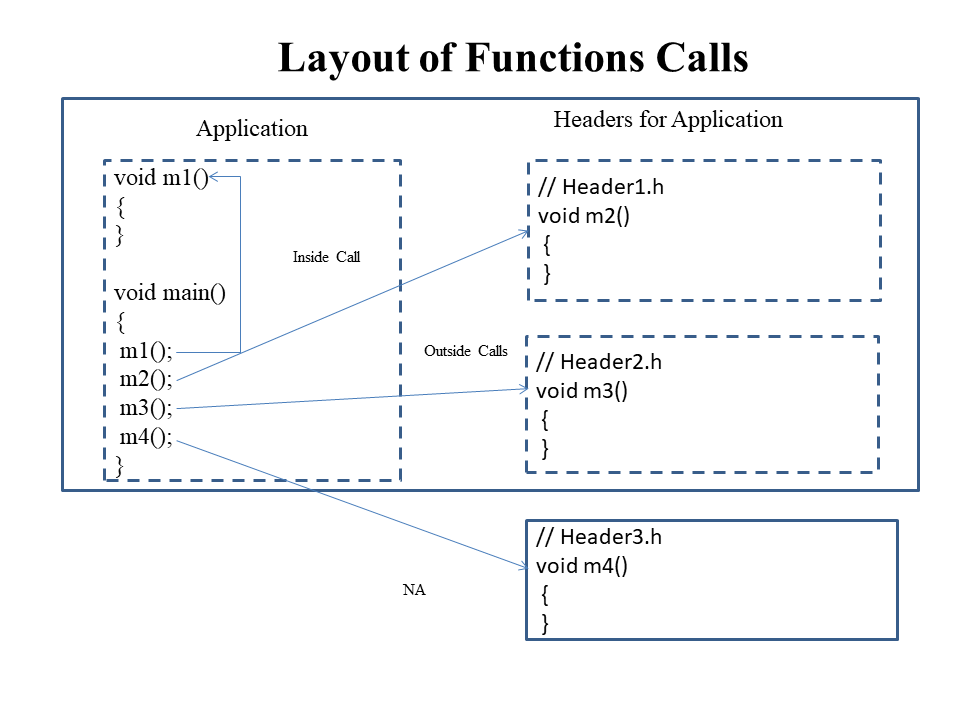

In [7]:
from IPython.display import Image

Image("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/method_call.png")

## Main Script

In [8]:
import csv, os, glob
import sys
import shutil
import clang.cindex
import sys, os, csv


def Extract_Headers(path):
    os.chdir(path)
    for dirpath, dirnames, files in os.walk(os.getcwd()):
        st = dirpath.split('/')
        Folder_Name = st[len(st) - 1]
        for file_name in files:
            Source = dirpath + "/" + file_name
            if (file_name.endswith(".hpp") or file_name.endswith(".h")):
                col = []
                col.append(Source)
                col.append(file_name)
                if col not in Header_Files:
                    Header_Files.append(col)
    return Header_Files


def Application_Headers(tu, File_Content_Array):
    include_bool = 0
    ident_lin = ident_col = 0
    filename = tu.cursor.spelling
    Headers = []
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling == "include":
            include_bool = 1
        elif c.kind == clang.cindex.TokenKind.LITERAL and include_bool == 1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            if c.spelling.count("/") != 0:
                Tokens = c.spelling.split("/")
                temp = Tokens[len(Tokens) - 1]
                st1 = temp[0:len(temp) - 1]
            else:
                temp = c.spelling
                st1 = temp[1:len(temp) - 1]
            col = []
            col.append(st1)
            #col.append(0)
            Headers.append(col)
            include_bool = 0
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling != "include" and c.spelling != 'h':
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            if st.count("include") != 0:
                position = st.index(c.spelling) + len(c.spelling)
                if st[position] == ".":
                    col = []
                    st1 = c.spelling + ".h"
                    col.append(st1)
                    #col.append(1)
                    Headers.append(col)
            include_bool = 0
    return Headers


def Extract_Application_Headers(File_Name, Project_Headers):
    global Headers_Detail, Headers_Graph
    idx = clang.cindex.Index.create()
    tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)

    App_Headers = Application_Headers(tu, File_Content_Array)
    Headers_List = []
    st = File_Name.split("/")
    col = []
    col.append(File_Name)
    col.append(st[len(st) - 1])
    Headers_Detail.append(col)
    #print(File_Name, len(App_Headers))
    for f in App_Headers:
        for g in Project_Headers:
            if f[0] == g[1]:
                col = []
                col.append(g[0])
                col.append(g[1])
                #col.append(g[2])
                Headers_List.append(col)
    Select_Headers(File_Name, Headers_List, 1, Project_Headers)
    return Headers_Detail, Headers_Graph


def Select_Headers(file_name, Head_List, depth, Project_Headers):
    global Headers_Detail, Headers_Graph, Final_Headers
    #print (file_name, Headers_Detail)
    # print ("$$$$$$$$$$$$$$$$$$$$$$$$", len(Headers_Detail))
    if len(Head_List) != 0 and depth >= 1:
        #print (file_name, len(Head_List), depth, len(Project_Headers))
        for h in Head_List:
            if h[1] not in Final_Headers:
                Final_Headers.append(h[1])
            if h not in Headers_Detail:
                col = []
                col.append(h[0])
                col.append(h[1])
                Headers_Detail.append(col)
            idx = clang.cindex.Index.create()
            tu = idx.parse(h[0], args='-xc++ --std=c++11'.split())
            col = []
            col.append(file_name)
            col.append(1)
            col.append(h[1])
            Headers_Graph.append(col)
            File_Content_Array = File_to_Array(tu.cursor)
            App_Headers = Application_Headers(tu, File_Content_Array)
            Headers_List = []
            #print (file_name, len(App_Headers))
            for f in App_Headers:
                for g in Project_Headers:
                    if f[0] == g[1]:
                        col = []
                        col.append(g[0])
                        col.append(g[1])
                        #col.append(g[2])
                        Headers_List.append(col)
            Select_Headers(h[0], Headers_List, depth - 1, Project_Headers)
    else:
        col = []
        col.append(file_name)
        col.append(1)
        col.append("End")
        Headers_Graph.append(col)


def Extract_Identifiers(File_Name):
    idx = clang.cindex.Index.create()
    tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
    filename = tu.cursor.spelling
    for c in tu.cursor.walk_preorder():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.CursorKind.VAR_DECL or c.kind == clang.cindex.CursorKind.PARM_DECL or c.kind == clang.cindex.CursorKind.DECL_REF_EXPR:
            col = []
            col.append(c.spelling)
            # print (c.spelling, c.kind, c.location)
            if col not in Identifiers:
                Identifiers.append(col)
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Identifiers:
            st = c.spelling
            if st[0:5].lower() == "petsc":
                col = []
                col.append(c.spelling)
                if col not in Identifiers:
                    Identifiers.append(col)
    return Identifiers


def Extract_Line_Column(c):
    x = str(c.location)
    y = x.split(',')
    line = y[1]
    column = y[2]
    line = line.split()
    line = line[1]
    column = column.split()
    column = column[1]
    return line, column


def File_to_Array(cursor):
    File_Content_Array = []
    filename = cursor.spelling
    with open(filename) as f:
        for line in f:
            File_Content_Array.append(line)
    return File_Content_Array


def Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers):
    #global Keywords
    ident_lin = 0
    ident_col = 0
    literal_col = 0
    literal_lin = 0
    literal_bool = 0
    punct_bool = 0
    index1 = 0
    index2 = 0
    identifier = ""
    literal_st_pos = 0
    literal_end_pos = 0
    filename = tu.cursor.spelling
    Functions_Detail = []
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Keywords and c.spelling not in Identifiers:  # c.spelling.lower() not in Keywords2 and c.spelling.lower() not in Keywords1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            Tokens = st.split()
            Token_Index = -1
            for f in range(len(Tokens)):
                if Tokens[f] == c.spelling:
                    Token_Index = f
            Ident_Index = st.find(c.spelling)
            Paren_Index = st.find("(")
            if (Tokens[0] in Keywords or Tokens[0].lower().count("petsc") != 0) and c.spelling not in Identifiers and
                    st[Ident_Index + len(c.spelling)] == "(" and st.count("=") == 0 and Token_Index > 0 and st.count(
                    "(") != 0 and st.count(")") != 0 and Ident_Index < Paren_Index:
                col = []
                col.append(file_name)
                col.append(c.spelling)
                col.append("Prototype")
                col.append(File_Content_Array[int(ident_lin) - 1])
                col.append(ident_lin)
                col.append(ident_col)
                if col not in Functions_Detail:
                    #print (col)
                    Functions_Detail.append(col)
    for c in tu.cursor.walk_preorder():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        #else:
        elif c.kind == clang.cindex.CursorKind.FUNCTION_DECL:  # c.kind==clang.cindex.CursorKind.DECL_REF_EXPR:
            lin1, col1 = Extract_Line_Column(c)
            col1 = col1[:-1]
            st = File_Content_Array[int(lin1) - 1]
            if st.count(";"):
                #print c.spelling,"Prototype", File_Content_Array[int(lin1)-1], lin1
                func_type = "Prototype"
            else:
                #print c.spelling,"Definition", File_Content_Array[int(lin1)-1], lin1
                func_type = "Definition"
            flag = 0
            ind = -1
            for k in range(len(Functions_Detail)):
                if Functions_Detail[k][0] == file_name and Functions_Detail[k][1] == c.spelling and Functions_Detail[k][
                    2] == "Prototype":
                    flag = 1
                    ind = k
            if flag == 0 and ind == -1:
                col = []
                col.append(file_name)
                col.append(c.spelling)
                col.append(func_type)
                col.append(File_Content_Array[int(lin1) - 1])
                col.append(lin1)
                col.append(col1)
                if col not in Functions_Detail:
                    Functions_Detail.append(col)
            elif flag == 1 and ind != -1:

                Functions_Detail[int(ind)][2] = func_type
                Functions_Detail[int(ind)][3] = File_Content_Array[int(lin1) - 1]
                Functions_Detail[int(ind)][4] = lin1
                Functions_Detail[int(ind)][5] = col1

    return Functions_Detail


def Extract_Functions_Calls(file_name, tu, File_Content_Array, Functions_Detail, identifiers, Keywords):
    ident_lin = 0
    ident_col = 0
    literal_col = 0
    literal_lin = 0
    literal_bool = 0
    punct_bool = 0
    index1 = 0
    index2 = 0
    identifier = ""
    literal_st_pos = 0
    literal_end_pos = 0
    filename = tu.cursor.spelling
    from_file = ""
    func_def = ""
    func_def_lin = func_def_col = 0
    Function_def = []
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Keywords and c.spelling not in identifiers and c.spelling != "main":  # c.spelling.lower() not in Keywords2 and c.spelling.lower() not in Keywords1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            #print (c.spelling, ident_lin, st)
            flg = 0
            for f in Functions_Detail:
                if f[1] == c.spelling and f[4] != ident_lin:
                    if f[0] == file_name:
                        call_type = "Inside"
                    elif f[0] != file_name:
                        call_type = "Outside"
                    from_file = f[0]
                    func_def = f[3]
                    func_def_lin = f[4]
                    func_def_col = f[5]
                    flg = 1
                    col = []
                    col.append(file_name)  # From File
                    col.append(c.spelling)
                    col.append(call_type)
                    col.append(File_Content_Array[int(ident_lin) - 1])
                    col.append(ident_lin)
                    col.append(ident_col)
                    col.append(from_file)  # to File
                    col.append(func_def)  # Function Definition/Ptottype
                    col.append(func_def_lin)  # Line Number of Function Definition
                    col.append(func_def_col)  # Column Number of Function Definition
                    Functions_Calls.append(col)
                    #print (c.spelling, c.location, "3")
            if flg == 0:
                Ident_Index = st.find(c.spelling)
                Paren_Index = st.find("(")
                if st.count("(") != 0 and st.count(")") != 0 and st[Ident_Index + len(c.spelling)] == "(" and st.count(
                        ";") != 0:
                    call_type = "NA"
                    from_file = "File could not accessed"
                    func_def = "Function Definition could not accesed"
                    func_def_lin = 0
                    func_def_col = 0
                    col = []
                    col.append(file_name)  # From File
                    col.append(c.spelling)
                    #col.append(Extract_Function_Qualified_Name(c))
                    col.append(call_type)
                    col.append(File_Content_Array[int(ident_lin) - 1])
                    col.append(ident_lin)
                    col.append(ident_col)
                    col.append(from_file)  # to File
                    col.append(func_def)  # Function Definition/Ptottype
                    col.append(func_def_lin)  # Line Number of Function Definition
                    col.append(func_def_col)  # Column Number of Function Definition
                    Functions_Calls.append(col)
                    # print (c.spelling, c.location, "4")
    return Functions_Calls


### a) Toy Example

     The file example3.c could be accessed from code-analysis/dynamic/tests directory.

In [9]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')
Final_Functions_Definitions = []
Keywords = []
File_Functions = []
Header_Files = []
Petsc_Headers = []
Final_Headers = []
Headers_Detail = []
Headers_Graph = []
Functions = []
Keywords = []
#Functions_Detail=[]
Functions_Calls = []
Identifiers = []

#project_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3"
application_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/tests"
File_Name = application_path + "/" + "example3.c"

#Project_Headers= Extract_Headers(project_path)
#print (Project_Headers)
#if len(Project_Headers)==0:
Project_Headers = []

Applications_Headers, Project_Headers_Graph = Extract_Application_Headers(File_Name, Project_Headers)

Keywords = ['if', 'for', 'while', 'default', 'do', 'void', 'switch', 'int', 'float', 'double', 'char', 'string',
            'printf', 'scanf', 'cin', 'cout']
Identifiers = Extract_Identifiers(File_Name)

for f in Applications_Headers:
    file_name = f[0]
    idx = clang.cindex.Index.create()
    tu = idx.parse(file_name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)
    Identifiers = Extract_Identifiers(file_name)
    Functions_List = Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers)
    col = []
    col.append(file_name)
    col.append(len(Functions_List))
    File_Functions.append(col)
    if len(Functions_List) != 0:
        for g in Functions_List:
            if g not in Final_Functions_Definitions:
                Final_Functions_Definitions.append(g)

columns = ['File Name', 'Total Functions']
Total_Functions = pd.DataFrame.from_records(data=File_Functions, columns=columns)
display(Total_Functions)

columns = ['File Name', 'Function Name', 'Type', 'Function Definition', 'Line Number', 'Column Number']
Functions_Definitions = pd.DataFrame.from_records(data=Final_Functions_Definitions, columns=columns)
display(Functions_Definitions)

identifiers = Extract_Identifiers(File_Name)
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
File_Content_Array = File_to_Array(tu.cursor)

Final_Functions_Calls = Extract_Functions_Calls(File_Name, tu, File_Content_Array, Final_Functions_Definitions,
                                                identifiers, Keywords)

columns = ['From_File', 'Reference Point', 'Reference Scope', 'Calling Point Description', 'Line Number',
           'Column Number', 'To_File', 'Called Point Description', 'Line Number', 'Column Number']
Functions_Calls = pd.DataFrame.from_records(data=Final_Functions_Calls, columns=columns)
display(Functions_Calls)

,File Name,Total Functions
0,/Users/shussain/code-analysis/dynamic/tests/ex...,3


,File Name,Function Name,Type,Function Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/tests/ex...,foo,Definition,bool foo()\n,1,6
1,/Users/shussain/code-analysis/dynamic/tests/ex...,bar,Definition,void bar()\n,6,6
2,/Users/shussain/code-analysis/dynamic/tests/ex...,main,Definition,int main()\n,13,5


,From_File,Reference Point,Reference Scope,Calling Point Description,Line Number,Column Number,To_File,Called Point Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/tests/ex...,foo,Inside,foo();\n,8,5,/Users/shussain/code-analysis/dynamic/tests/ex...,bool foo()\n,1,6
1,/Users/shussain/code-analysis/dynamic/tests/ex...,foo,Inside,foo();\n,10,9,/Users/shussain/code-analysis/dynamic/tests/ex...,bool foo()\n,1,6
2,/Users/shussain/code-analysis/dynamic/tests/ex...,bar,Inside,bar();\n,15,5,/Users/shussain/code-analysis/dynamic/tests/ex...,void bar()\n,6,6
3,/Users/shussain/code-analysis/dynamic/tests/ex...,foo,Inside,if (foo())\n,16,9,/Users/shussain/code-analysis/dynamic/tests/ex...,bool foo()\n,1,6
4,/Users/shussain/code-analysis/dynamic/tests/ex...,bar,Inside,bar();\n,17,9,/Users/shussain/code-analysis/dynamic/tests/ex...,void bar()\n,6,6


### b) PETSc Example

    The file ex5.c could be accessed from cpetsc-3.14.3/src/snes/tutorials directory.

In [10]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')
Final_Functions_Definitions = []
Keywords = []
File_Functions = []
Header_Files = []
Petsc_Headers = []
Final_Headers = []
#Headers_Detail=[]
Headers_Graph = []
Functions = []
Keywords = []
Functions_Detail = []
Functions_Calls = []
Identifiers = []

project_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3"
application_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
File_Name = application_path + "/" + "ex5.c"

Project_Headers = Extract_Headers(project_path)
Applications_Headers, Project_Headers_Graph = Extract_Application_Headers(File_Name, Project_Headers)

os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

for f in Applications_Headers:
    file_name = f[0]
    idx = clang.cindex.Index.create()
    tu = idx.parse(file_name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)
    Identifiers = Extract_Identifiers(file_name)
    Functions_List = Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers)
    col = []
    col.append(file_name)
    col.append(len(Functions_List))
    File_Functions.append(col)
    if len(Functions_List) != 0:
        for g in Functions_List:
            if g not in Final_Functions_Definitions:
                Final_Functions_Definitions.append(g)

columns = ['File Name', 'Total Functions']
Total_Functions = pd.DataFrame.from_records(data=File_Functions, columns=columns)
display(Total_Functions)

columns = ['File Name', 'Function Name', 'Type', 'Function Definition', 'Line Number', 'Column Number']
Functions_Definitions = pd.DataFrame.from_records(data=Final_Functions_Definitions, columns=columns)
display(Functions_Definitions)

identifiers = Extract_Identifiers(File_Name)
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
File_Content_Array = File_to_Array(tu.cursor)

Final_Functions_Calls = Extract_Functions_Calls(File_Name, tu, File_Content_Array, Final_Functions_Definitions,
                                                identifiers, Keywords)

columns = ['From_File', 'Reference Point', 'Reference Scope', 'Calling Point Description', 'Line Number',
           'Column Number', 'To_File', 'Called Point Description', 'Line Number', 'Column Number']
Functions_Calls = pd.DataFrame.from_records(data=Final_Functions_Calls, columns=columns)
display(Functions_Calls)



,File Name,Total Functions
0,/Users/shussain/code-analysis/dynamic/tests/ex...,3
1,/Users/shussain/code-analysis/dynamic/Projects...,17
2,/Users/shussain/code-analysis/dynamic/Projects...,248
3,/Users/shussain/code-analysis/dynamic/Projects...,0
4,/Users/shussain/code-analysis/dynamic/Projects...,0
5,/Users/shussain/code-analysis/dynamic/Projects...,96
6,/Users/shussain/code-analysis/dynamic/Projects...,0
7,/Users/shussain/code-analysis/dynamic/Projects...,0
8,/Users/shussain/code-analysis/dynamic/Projects...,327
9,/Users/shussain/code-analysis/dynamic/Projects...,0


,File Name,Function Name,Type,Function Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/tests/ex...,foo,Definition,bool foo()\n,1,6
1,/Users/shussain/code-analysis/dynamic/tests/ex...,bar,Definition,void bar()\n,6,6
2,/Users/shussain/code-analysis/dynamic/tests/ex...,main,Definition,int main()\n,13,5
3,/Users/shussain/code-analysis/dynamic/Projects...,FormInitialGuess,Definition,"PetscErrorCode FormInitialGuess(DM da,AppCtx *...",248,16
4,/Users/shussain/code-analysis/dynamic/Projects...,FormFunctionLocal,Definition,PetscErrorCode FormFunctionLocal(DMDALocalInfo...,419,16
...,...,...,...,...,...,...
687,/Users/shussain/code-analysis/dynamic/Projects...,DMSNESCheckDiscretization,Prototype,PETSC_EXTERN PetscErrorCode DMSNESCheckDiscret...,894,29
688,/Users/shussain/code-analysis/dynamic/Projects...,DMSNESCheckResidual,Prototype,PETSC_EXTERN PetscErrorCode DMSNESCheckResidua...,895,29
689,/Users/shussain/code-analysis/dynamic/Projects...,DMSNESCheckJacobian,Prototype,PETSC_EXTERN PetscErrorCode DMSNESCheckJacobia...,896,29
690,/Users/shussain/code-analysis/dynamic/Projects...,DMSNESCheckFromOptions,Prototype,PETSC_EXTERN PetscErrorCode DMSNESCheckFromOpt...,897,29


,From_File,Reference Point,Reference Scope,Calling Point Description,Line Number,Column Number,To_File,Called Point Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,FormInitialGuess,Inside,"extern PetscErrorCode FormInitialGuess(DM,AppC...",75,23,/Users/shussain/code-analysis/dynamic/Projects...,"PetscErrorCode FormInitialGuess(DM da,AppCtx *...",248,16
1,/Users/shussain/code-analysis/dynamic/Projects...,FormFunctionLocal,Inside,extern PetscErrorCode FormFunctionLocal(DMDALo...,76,23,/Users/shussain/code-analysis/dynamic/Projects...,PetscErrorCode FormFunctionLocal(DMDALocalInfo...,419,16
2,/Users/shussain/code-analysis/dynamic/Projects...,FormExactSolution,Inside,"extern PetscErrorCode FormExactSolution(DM,App...",77,23,/Users/shussain/code-analysis/dynamic/Projects...,"PetscErrorCode FormExactSolution(DM da, AppCtx...",312,16
3,/Users/shussain/code-analysis/dynamic/Projects...,ZeroBCSolution,Inside,"extern PetscErrorCode ZeroBCSolution(AppCtx*,c...",78,23,/Users/shussain/code-analysis/dynamic/Projects...,"PetscErrorCode ZeroBCSolution(AppCtx *user,con...",337,16
4,/Users/shussain/code-analysis/dynamic/Projects...,MMSSolution1,Inside,"extern PetscErrorCode MMSSolution1(AppCtx*,con...",79,23,/Users/shussain/code-analysis/dynamic/Projects...,"PetscErrorCode MMSSolution1(AppCtx *user,const...",349,16
...,...,...,...,...,...,...,...,...,...,...
332,/Users/shussain/code-analysis/dynamic/Projects...,DMDAVecRestoreArray,Outside,"ierr = DMDAVecRestoreArray(da,localB,&b);C...",765,12,/Users/shussain/code-analysis/dynamic/Projects...,PETSC_EXTERN PetscErrorCode DMDAVecRestoreArra...,114,29
333,/Users/shussain/code-analysis/dynamic/Projects...,CHKERRQ,NA,"ierr = DMDAVecRestoreArray(da,localB,&b);C...",765,46,File could not accessed,Function Definition could not accesed,0,0
334,/Users/shussain/code-analysis/dynamic/Projects...,DMRestoreLocalVector,Outside,"ierr = DMRestoreLocalVector(da,&localB);CH...",766,12,/Users/shussain/code-analysis/dynamic/Projects...,PETSC_EXTERN PetscErrorCode DMRestoreLocalVect...,59,29
335,/Users/shussain/code-analysis/dynamic/Projects...,CHKERRQ,NA,"ierr = DMRestoreLocalVector(da,&localB);CH...",766,45,File could not accessed,Function Definition could not accesed,0,0


### c) Slepc Example

    The file ex5.c could be accessed from slepc-Firedrake_20210413.0/src/eps/tutorials directory.

In [11]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')
Final_Functions_Definitions = []
Keywords = []
File_Functions = []
Header_Files = []
Petsc_Headers = []
Final_Headers = []
Headers_Detail = []
Headers_Graph = []
Functions = []
Keywords = []
Functions_Detail = []
Functions_Calls = []
Identifiers = []

project_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/slepc-Firedrake_20210413.0"
application_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/slepc-Firedrake_20210413.0/src/eps/tutorials"
File_Name = application_path + "/" + "ex5.c"

Project_Headers = Extract_Headers(project_path)
Applications_Headers, Project_Headers_Graph = Extract_Application_Headers(File_Name, Project_Headers)

os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Slepc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

for f in Applications_Headers:
    file_name = f[0]
    idx = clang.cindex.Index.create()
    tu = idx.parse(file_name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)
    Identifiers = Extract_Identifiers(file_name)
    Functions_List = Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers)
    col = []
    col.append(file_name)
    col.append(len(Functions_List))
    File_Functions.append(col)
    if len(Functions_List) != 0:
        for g in Functions_List:
            if g not in Final_Functions_Definitions:
                Final_Functions_Definitions.append(g)

columns = ['File Name', 'Total Functions']
Total_Functions = pd.DataFrame.from_records(data=File_Functions, columns=columns)
display(Total_Functions)

columns = ['File Name', 'Function Name', 'Type', 'Function Definition', 'Line Number', 'Column Number']
Functions_Definitions = pd.DataFrame.from_records(data=Final_Functions_Definitions, columns=columns)
display(Functions_Definitions)

identifiers = Extract_Identifiers(File_Name)
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
File_Content_Array = File_to_Array(tu.cursor)

Final_Functions_Calls = Extract_Functions_Calls(File_Name, tu, File_Content_Array, Final_Functions_Definitions,
                                                identifiers, Keywords)

columns = ['From_File', 'Reference Point', 'Reference Scope', 'Calling Point Description', 'Line Number',
           'Column Number', 'To_File', 'Called Point Description', 'Line Number', 'Column Number']
Functions_Calls = pd.DataFrame.from_records(data=Final_Functions_Calls, columns=columns)
display(Functions_Calls)




,File Name,Total Functions
0,/Users/shussain/code-analysis/dynamic/Projects...,2
1,/Users/shussain/code-analysis/dynamic/Projects...,0
2,/Users/shussain/code-analysis/dynamic/Projects...,0
3,/Users/shussain/code-analysis/dynamic/Projects...,0


,File Name,Function Name,Type,Function Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,MatMarkovModel,Definition,"PetscErrorCode MatMarkovModel(PetscInt m,Mat A)\n",140,16
1,/Users/shussain/code-analysis/dynamic/Projects...,main,Definition,"int main(int argc,char **argv)\n",24,5


,From_File,Reference Point,Reference Scope,Calling Point Description,Line Number,Column Number,To_File,Called Point Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,MatMarkovModel,Inside,"PetscErrorCode MatMarkovModel(PetscInt m,Mat A...",22,16,/Users/shussain/code-analysis/dynamic/Projects...,"PetscErrorCode MatMarkovModel(PetscInt m,Mat A)\n",140,16
1,/Users/shussain/code-analysis/dynamic/Projects...,SlepcInitialize,NA,"ierr = SlepcInitialize(&argc,&argv,(char*)0,...",35,10,File could not accessed,Function Definition could not accesed,0,0
2,/Users/shussain/code-analysis/dynamic/Projects...,PetscOptionsGetInt,NA,"ierr = PetscOptionsGetInt(NULL,NULL,""-m"",&m,...",37,10,File could not accessed,Function Definition could not accesed,0,0
3,/Users/shussain/code-analysis/dynamic/Projects...,CHKERRQ,NA,"ierr = PetscOptionsGetInt(NULL,NULL,""-m"",&m,...",37,53,File could not accessed,Function Definition could not accesed,0,0
4,/Users/shussain/code-analysis/dynamic/Projects...,PetscPrintf,NA,"ierr = PetscPrintf(PETSC_COMM_WORLD,""\nMarko...",39,10,File could not accessed,Function Definition could not accesed,0,0
...,...,...,...,...,...,...,...,...,...,...
84,/Users/shussain/code-analysis/dynamic/Projects...,MatAssemblyBegin,NA,"ierr = MatAssemblyBegin(A,MAT_FINAL_ASSEMBLY...",180,10,File could not accessed,Function Definition could not accesed,0,0
85,/Users/shussain/code-analysis/dynamic/Projects...,CHKERRQ,NA,"ierr = MatAssemblyBegin(A,MAT_FINAL_ASSEMBLY...",180,49,File could not accessed,Function Definition could not accesed,0,0
86,/Users/shussain/code-analysis/dynamic/Projects...,MatAssemblyEnd,NA,"ierr = MatAssemblyEnd(A,MAT_FINAL_ASSEMBLY);...",181,10,File could not accessed,Function Definition could not accesed,0,0
87,/Users/shussain/code-analysis/dynamic/Projects...,CHKERRQ,NA,"ierr = MatAssemblyEnd(A,MAT_FINAL_ASSEMBLY);...",181,47,File could not accessed,Function Definition could not accesed,0,0


### d) Hypre Example

The file ex5.c could be accessed from hypre-2.19.0/src/examples directory.

In [12]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')
Final_Functions_Definitions = []
Keywords = []
File_Functions = []
Header_Files = []
Petsc_Headers = []
Final_Headers = []
Headers_Detail = []
Headers_Graph = []
Functions = []
Keywords = []
Functions_Detail = []
Functions_Calls = []
Identifiers = []

project_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/hypre-2.19.0"
application_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/hypre-2.19.0/src/examples"
File_Name = application_path + "/" + "ex5.c"

Project_Headers = Extract_Headers(project_path)
Applications_Headers, Project_Headers_Graph = Extract_Application_Headers(File_Name, Project_Headers)

os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Hypre_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

for f in Applications_Headers:
    file_name = f[0]
    idx = clang.cindex.Index.create()
    tu = idx.parse(file_name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)
    Identifiers = Extract_Identifiers(file_name)
    Functions_List = Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers)
    col = []
    col.append(file_name)
    col.append(len(Functions_List))
    File_Functions.append(col)
    if len(Functions_List) != 0:
        for g in Functions_List:
            if g not in Final_Functions_Definitions:
                Final_Functions_Definitions.append(g)

columns = ['File Name', 'Total Functions']
Total_Functions = pd.DataFrame.from_records(data=File_Functions, columns=columns)
display(Total_Functions)

columns = ['File Name', 'Function Name', 'Type', 'Function Definition', 'Line Number', 'Column Number']
Functions_Definitions = pd.DataFrame.from_records(data=Final_Functions_Definitions, columns=columns)
display(Functions_Definitions)

identifiers = Extract_Identifiers(File_Name)
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
File_Content_Array = File_to_Array(tu.cursor)

Final_Functions_Calls = Extract_Functions_Calls(File_Name, tu, File_Content_Array, Final_Functions_Definitions,
                                                identifiers, Keywords)

columns = ['From_File', 'Reference Point', 'Reference Scope', 'Calling Point Description', 'Line Number',
           'Column Number', 'To_File', 'Called Point Description', 'Line Number', 'Column Number']
Functions_Calls = pd.DataFrame.from_records(data=Final_Functions_Calls, columns=columns)
display(Functions_Calls)





,File Name,Total Functions
0,/Users/shussain/code-analysis/dynamic/Projects...,3
1,/Users/shussain/code-analysis/dynamic/Projects...,156
2,/Users/shussain/code-analysis/dynamic/Projects...,168
3,/Users/shussain/code-analysis/dynamic/Projects...,0
4,/Users/shussain/code-analysis/dynamic/Projects...,472


,File Name,Function Name,Type,Function Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,hypre_FlexGMRESModifyPCAMGExample,Definition,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,34,5
1,/Users/shussain/code-analysis/dynamic/Projects...,main,Definition,"int main (int argc, char *argv[])\n",38,5
2,/Users/shussain/code-analysis/dynamic/Projects...,hypre_FlexGMRESModifyPCAMGExample,Definition,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,615,5
3,/Users/shussain/code-analysis/dynamic/Projects...,hypre_ndigits,Prototype,HYPRE_Int hypre_ndigits( HYPRE_BigInt number );\n,82,11
4,/Users/shussain/code-analysis/dynamic/Projects...,hypre_printf,Prototype,"HYPRE_Int hypre_printf( const char *format , ....",83,11
...,...,...,...,...,...,...
794,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_BoomerAMGSetISType,Definition,HYPRE_Int HYPRE_BoomerAMGSetISType(HYPRE_Solve...,4072,11
795,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_ParCSRSetupInterpreter,Prototype,HYPRE_ParCSRSetupInterpreter(mv_InterfaceInter...,4092,1
796,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_ParCSRSetupMatvec,Prototype,HYPRE_ParCSRSetupMatvec(HYPRE_MatvecFunctions ...,4098,1
797,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_ParCSRMultiVectorPrint,Definition,"HYPRE_ParCSRMultiVectorPrint(void *x_,\n",4104,1


,From_File,Reference Point,Reference Scope,Calling Point Description,Line Number,Column Number,To_File,Called Point Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,hypre_FlexGMRESModifyPCAMGExample,Inside,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,34,5,/Users/shussain/code-analysis/dynamic/Projects...,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,615,5
1,/Users/shussain/code-analysis/dynamic/Projects...,MPI_Init,NA,"MPI_Init(&argc, &argv);\n",62,4,File could not accessed,Function Definition could not accesed,0,0
2,/Users/shussain/code-analysis/dynamic/Projects...,MPI_Comm_rank,NA,"MPI_Comm_rank(MPI_COMM_WORLD, &myid);\n",63,4,File could not accessed,Function Definition could not accesed,0,0
3,/Users/shussain/code-analysis/dynamic/Projects...,MPI_Comm_size,NA,"MPI_Comm_size(MPI_COMM_WORLD, &num_procs);\n",64,4,File could not accessed,Function Definition could not accesed,0,0
4,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_Init,Outside,HYPRE_Init();\n,67,4,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_Int HYPRE_Init();\n,2922,11
...,...,...,...,...,...,...,...,...,...,...
180,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_Finalize,Outside,HYPRE_Finalize();\n,597,4,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_Int HYPRE_Finalize();\n,2923,11
181,/Users/shussain/code-analysis/dynamic/Projects...,MPI_Finalize,NA,MPI_Finalize();\n,600,4,File could not accessed,Function Definition could not accesed,0,0
182,/Users/shussain/code-analysis/dynamic/Projects...,hypre_FlexGMRESModifyPCAMGExample,Inside,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,615,5,/Users/shussain/code-analysis/dynamic/Projects...,int hypre_FlexGMRESModifyPCAMGExample(void *pr...,34,5
183,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_BoomerAMGSetNumSweeps,Outside,HYPRE_BoomerAMGSetNumSweeps((HYPRE_Solve...,622,7,/Users/shussain/code-analysis/dynamic/Projects...,HYPRE_Int HYPRE_BoomerAMGSetNumSweeps(HYPRE_So...,689,11


### e) SuperLu Example

    The file ex5.c could be accessed from superlu/EXAMPLE directory.

In [13]:
import clang.cindex
import pandas as pd
import os
from clang.cindex import Config

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')
Final_Functions_Definitions = []
Keywords = []
File_Functions = []
Header_Files = []
Petsc_Headers = []
Final_Headers = []
Headers_Detail = []
Headers_Graph = []
Functions = []
Keywords = []
Functions_Detail = []
Functions_Calls = []
Identifiers = []

project_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/superlu"
application_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/superlu/EXAMPLE"
File_Name = application_path + "/" + "clinsol.c"

Project_Headers = Extract_Headers(project_path)
Applications_Headers, Project_Headers_Graph = Extract_Application_Headers(File_Name, Project_Headers)

os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Superlu_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

for f in Applications_Headers:
    file_name = f[0]
    idx = clang.cindex.Index.create()
    tu = idx.parse(file_name, args='-xc++ --std=c++11'.split())
    File_Content_Array = File_to_Array(tu.cursor)
    Identifiers = Extract_Identifiers(file_name)
    Functions_List = Extract_Functions_Definitions(file_name, tu, File_Content_Array, Keywords, Identifiers)
    col = []
    col.append(file_name)
    col.append(len(Functions_List))
    File_Functions.append(col)
    if len(Functions_List) != 0:
        for g in Functions_List:
            if g not in Final_Functions_Definitions:
                Final_Functions_Definitions.append(g)

columns = ['File Name', 'Total Functions']
Total_Functions = pd.DataFrame.from_records(data=File_Functions, columns=columns)
display(Total_Functions)

columns = ['File Name', 'Function Name', 'Type', 'Function Definition', 'Line Number', 'Column Number']
Functions_Definitions = pd.DataFrame.from_records(data=Final_Functions_Definitions, columns=columns)
display(Functions_Definitions)

identifiers = Extract_Identifiers(File_Name)
tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
File_Content_Array = File_to_Array(tu.cursor)

Final_Functions_Calls = Extract_Functions_Calls(File_Name, tu, File_Content_Array, Final_Functions_Definitions,
                                                identifiers, Keywords)

columns = ['From_File', 'Reference Point', 'Reference Scope', 'Calling Point Description', 'Line Number',
           'Column Number', 'To_File', 'Called Point Description', 'Line Number', 'Column Number']
Functions_Calls = pd.DataFrame.from_records(data=Final_Functions_Calls, columns=columns)
display(Functions_Calls)





,File Name,Total Functions
0,/Users/shussain/code-analysis/dynamic/Projects...,1
1,/Users/shussain/code-analysis/dynamic/Projects...,77


,File Name,Function Name,Type,Function Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,main,Definition,"int main(int argc, char *argv[])\n",21,5
1,/Users/shussain/code-analysis/dynamic/Projects...,cgssv,Definition,"cgssv(superlu_options_t *, SuperMatrix *, int ...",109,1
2,/Users/shussain/code-analysis/dynamic/Projects...,cgssvx,Definition,"cgssvx(superlu_options_t *, SuperMatrix *, int...",112,1
3,/Users/shussain/code-analysis/dynamic/Projects...,cgsisv,Definition,"cgsisv(superlu_options_t *, SuperMatrix *, int...",119,1
4,/Users/shussain/code-analysis/dynamic/Projects...,cgsisx,Definition,"cgsisx(superlu_options_t *, SuperMatrix *, int...",122,1
...,...,...,...,...,...,...
73,/Users/shussain/code-analysis/dynamic/Projects...,ctrsm_,Definition,"extern int ctrsm_(char*, char*, char*, char*, ...",276,12
74,/Users/shussain/code-analysis/dynamic/Projects...,cgemv_,Definition,"extern int cgemv_(char *, int *, int *, comple...",278,12
75,/Users/shussain/code-analysis/dynamic/Projects...,cusolve,Prototype,"extern void cusolve(int, int, complex*, comple...",281,13
76,/Users/shussain/code-analysis/dynamic/Projects...,clsolve,Prototype,"extern void clsolve(int, int, complex*, comple...",282,13


,From_File,Reference Point,Reference Scope,Calling Point Description,Line Number,Column Number,To_File,Called Point Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,CHECK_MALLOC,NA,"CHECK_MALLOC(""Enter main()"");\n",42,5,File could not accessed,Function Definition could not accesed,0,0
1,/Users/shussain/code-analysis/dynamic/Projects...,set_default_options,NA,set_default_options(&options);\n,57,5,File could not accessed,Function Definition could not accesed,0,0
2,/Users/shussain/code-analysis/dynamic/Projects...,options,NA,set_default_options(&options);\n,57,26,File could not accessed,Function Definition could not accesed,0,0
3,/Users/shussain/code-analysis/dynamic/Projects...,creadhb,Outside,"creadhb(fp, &m, &n, &nnz, &a, &asub, &xa);\n",60,5,/Users/shussain/code-analysis/dynamic/Projects...,"extern void creadhb(FILE *, int *, int *, i...",250,16
4,/Users/shussain/code-analysis/dynamic/Projects...,cCreate_CompCol_Matrix,Outside,"cCreate_CompCol_Matrix(&A, m, n, nnz, a, a...",62,5,/Users/shussain/code-analysis/dynamic/Projects...,"cCreate_CompCol_Matrix(SuperMatrix *, int, int...",130,1
5,/Users/shussain/code-analysis/dynamic/Projects...,printf,NA,"printf(""Dimension %dx%d; # nonzeros %d\n"",...",64,5,File could not accessed,Function Definition could not accesed,0,0
6,/Users/shussain/code-analysis/dynamic/Projects...,complexMalloc,Outside,if ( !(rhs = complexMalloc(m * nrhs)) ) AB...,67,18,/Users/shussain/code-analysis/dynamic/Projects...,extern complex *complexMalloc(int);\n,241,18
7,/Users/shussain/code-analysis/dynamic/Projects...,ABORT,NA,if ( !(rhs = complexMalloc(m * nrhs)) ) AB...,67,45,File could not accessed,Function Definition could not accesed,0,0
8,/Users/shussain/code-analysis/dynamic/Projects...,cCreate_Dense_Matrix,Outside,"cCreate_Dense_Matrix(&B, m, nrhs, rhs, m, ...",68,5,/Users/shussain/code-analysis/dynamic/Projects...,"cCreate_Dense_Matrix(SuperMatrix *, int, int, ...",138,1
9,/Users/shussain/code-analysis/dynamic/Projects...,complexMalloc,Outside,xact = complexMalloc(n * nrhs);\n,69,12,/Users/shussain/code-analysis/dynamic/Projects...,extern complex *complexMalloc(int);\n,241,18


## 9. Analysis 3: (Analysis of Developer's Rules Violation)

### Main Script

In [14]:
import clang.cindex
import sys, os, csv, glob
import shutil


def Extract_Applications(path):
    Applications = []
    os.chdir(path)
    for dirpath, dirnames, files in os.walk(path):
        st = dirpath.split('/')
        Folder_Name = st[len(st) - 1]
        for file_name in files:
            Source = dirpath + "/" + file_name
            if (file_name.endswith('.c')):
                col = []
                col.append(Source)
                col.append(file_name)
                if col not in Applications:
                    Applications.append(col)
                #shutil.copy(Source, Destination)
    return Applications


def Extract_Line_Column(c):
    x = str(c.location)
    y = x.split(',')
    line = y[1]
    column = y[2]
    line = line.split()
    line = line[1]
    column = column.split()
    column = column[1]
    return line, column


def File_to_Array(cursor):
    File_Content_Array = []
    filename = cursor.spelling
    with open(filename) as f:
        for line in f:
            File_Content_Array.append(line)
    return File_Content_Array


def Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords):
    enum_bool = 0
    open_curley_bool = 0
    close_curley_bool = 0
    enum_lin = 0
    enum_col = 0
    Enum_List = []
    for c in tu.cursor.get_tokens():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.KEYWORD and c.spelling == "enum":
            enum_bool = 1
        elif c.kind == clang.cindex.TokenKind.PUNCTUATION and c.spelling == "{" and enum_bool == 1:
            open_curley_bool = 1
        elif c.kind == clang.cindex.TokenKind.PUNCTUATION and c.spelling == "}" and open_curley_bool == 1 and enum_bool == 1:
            close_curley_bool = 1

            literal_lin, literal_col = Extract_Line_Column(c)
            literal_col = literal_col[:-1]
            literal_st_pos = literal_col
            literal_end_pos = int(literal_col) + len(c.spelling)
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and enum_bool == 1 and open_curley_bool == 1 and close_curley_bool == 0 and c.spelling not in Keywords:
            enum_lin, enum_col = Extract_Line_Column(c)
            enum_col = enum_col[:-1]
            st = File_Content_Array[int(enum_lin) - 1]
            col = []
            col.append(Final_File)
            col.append(Folder_Name)
            col.append(File_Name)
            col.append(c.spelling)
            col.append(st)
            if c.spelling.isupper():
                col.append("Element")
            else:
                col.append("Object")
            col.append(enum_lin)
            col.append(enum_col)
            if col not in Enum_List:
                Enum_List.append(col)
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and enum_bool == 1 and open_curley_bool == 1 and close_curley_bool == 1 and c.spelling not in Keywords:
            enum_lin, enum_col = Extract_Line_Column(c)
            enum_col = enum_col[:-1]
            enum_lin, enum_col = Extract_Line_Column(c)
            enum_col = enum_col[:-1]
            st = File_Content_Array[int(enum_lin) - 1]
            col = []
            col.append(Final_File)
            col.append(Folder_Name)
            col.append(File_Name)
            col.append(c.spelling)
            col.append(st)
            if c.spelling.isupper():
                col.append("Element")
            else:
                col.append("Object")
            col.append(enum_lin)
            col.append(enum_col)
            if col not in Enum_List:
                Enum_List.append(col)
            #print c.spelling, c.location
            enum_bool = 0
            open_curley_bool = 0
            close_curley_bool = 0
    return Enum_List


def Extract_Macros(tu, File_Content_Array, Final_File, Folder_Name, File_Name):
    Macro_Name = ""
    Tokens = ""
    st = ""
    pos = 0
    macro_lin = 0
    macro_col = 0
    Macro_List = []
    for c in tu.cursor.get_tokens():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling == "define":
            macro_lin, macro_col = Extract_Line_Column(c)
            macro_col = macro_col[:-1]
            st = File_Content_Array[int(macro_lin) - 1]
            pos = st.find("define")
            # print c.spelling, c.location, pos
            if st.count("define") == 1 and st[pos - 1] == "#":
                Tokens = st.split()
                Macro_Name = Tokens[1]
                col = []
                col.append(Final_File)
                col.append(Folder_Name)
                col.append(File_Name)
                col.append(Macro_Name)
                col.append(st)
                if st.count("(") >= 1 and st.count(")") >= 1:
                    col.append("Function")
                else:
                    col.append("Variable")
                col.append(macro_lin)
                col.append(macro_col)
                if col not in Macro_List:
                    Macro_List.append(col)

    return Macro_List


def Extract_Objects(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords):
    Object_Name = ""
    Tokens = ""
    st = ""
    st1 = ""
    pos = 0
    object_lin = 0
    object_col = 0
    curley_bool = 0
    curley_lin = 0
    curley_col = 0
    Object_List = []

    for c in tu.cursor.get_tokens():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.PUNCTUATION and c.spelling == "}" and curley_bool == 1:
            curley_lin, curley_col = Extract_Line_Column(c)
            curley_col = curley_col[:-1]
            st = File_Content_Array[int(curley_lin) - 1]
            #print c.spelling,st1, c.location
            st1 = st.split()
            curley_bool = 0
            if len(st1) > 1:
                st2 = st1[1]
                if st2.count(",") == 0:
                    Object_Name = st2[0:len(st2) - 1]
                    col = []
                    col.append(Final_File)
                    col.append(Folder_Name)
                    col.append(File_Name)
                    col.append(Object_Name)
                    col.append(st)
                    col.append(curley_lin)
                    col.append(curley_col)
                    if col not in Object_List:
                        Object_List.append(col)
                else:
                    st3 = st2.split(",")
                    for i in st3:
                        if i.count(";") == 0:
                            Object_Name = i
                        else:
                            Object_Name = i[0:len(i) - 1]
                        col = []
                        col.append(Final_File)
                        col.append(Folder_Name)
                        col.append(File_Name)
                        col.append(Object_Name)
                        col.append(st)
                        col.append(curley_lin)
                        col.append(curley_col)
                        if col not in Object_List:
                            Object_List.append(col)
        elif c.kind == clang.cindex.TokenKind.KEYWORD and c.spelling == "typedef":
            object_lin, object_col = Extract_Line_Column(c)
            object_col = object_col[:-1]
            st = File_Content_Array[int(object_lin) - 1]
            pos = st.find("typedef")
            # print c.spelling, c.location, pos
            cnt = len(st.split())
            if st.count("typedef") == 1 and st.count("struct") == 1 and st.count("{") == 0 and cnt > 2:
                # print Final_File, st, cnt
                Tokens = st.split()
                st1 = Tokens[3]
                if st1.count("*") >= 0:
                    Object_Name = st1
                    #print Object_Name, "Without *", c.location
                else:
                    count_ast = st1.count("*")
                    Object_Name = st1[count_ast:len(st1)]
                    #print Object_Name, " with  ", count_ast, "*", c.location
                if Object_Name.count("*") == 1:
                    Object_Name = Object_Name[1:len(Object_Name) - 1]
                if Object_Name.count(";") == 1:
                    Object_Name = Object_Name[0:len(Object_Name) - 2]
                col = []
                col.append(Final_File)
                col.append(Folder_Name)
                col.append(File_Name)
                col.append(Object_Name)
                col.append(st)
                col.append(object_lin)
                col.append(object_col)
                if col not in Object_List:
                    Object_List.append(col)
            elif st.count("typedef") == 1 and st.count("struct") == 1 and (st.count("{") == 1 or cnt <= 2):
                curley_bool = 1

    return Object_List


def Extract_Identifiers(File_Name):
    Petsc_Class_Names = ['SNES', 'KSP', 'DM', "SYS", "VEC", "MAT", "TAO", "PC"]
    idx = clang.cindex.Index.create()
    tu = idx.parse(File_Name, args='-xc++ --std=c++11'.split())
    filename = tu.cursor.spelling
    Identifiers = []
    for c in tu.cursor.walk_preorder():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.CursorKind.VAR_DECL or c.kind == clang.cindex.CursorKind.PARM_DECL or c.kind == clang.cindex.CursorKind.DECL_REF_EXPR:
            col = []
            col.append(c.spelling)
            # print (c.spelling, c.kind, c.location)
            if col not in Identifiers:
                Identifiers.append(col)
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Identifiers:
            st = c.spelling
            if st[0:5].lower() == "petsc" or st in Petsc_Class_Names or st.upper() in Petsc_Class_Names:
                col = []
                col.append(c.spelling)
                if col not in Identifiers:
                    Identifiers.append(col)
    return Identifiers


def Extract_Functions(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords, Enum_Names, Macro_Names,
                      Object_Names, Identifiers):
    filename = tu.cursor.spelling
    Function_List = []
    for c in tu.cursor.walk_preorder():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.CursorKind.NAMESPACE:
            Name_Space = c.spelling
        elif c.kind == clang.cindex.CursorKind.FUNCTION_DECL or c.kind == clang.cindex.CursorKind.CXX_METHOD or c.kind == clang.cindex.CursorKind.FUNCTION_TEMPLATE:
            lin1, col1 = Extract_Line_Column(c)
            col1 = col1[:-1]
            st = File_Content_Array[int(lin1) - 1]
            col = []
            col.append(Final_File)
            col.append(Folder_Name)
            col.append(File_Name)
            col.append(c.spelling)
            col.append(st)
            col.append("Definition")
            col.append(lin1)
            col.append(col1)
            Function_List.append(col)
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Macro_Names and c.spelling not in Enum_Names and c.spelling not in Object_Names and c.spelling not in Identifiers and c.spelling not in Keywords:  # c.spelling.lower() not in Keywords2 and c.spelling.lower() not in Keywords1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            Tokens = st.split()
            Token_Index = -1
            for f in range(len(Tokens)):
                if Tokens[f] == c.spelling:
                    Token_Index = f
            Ident_Index = st.find(c.spelling)
            Paren_Index = st.find("(")
            #print (c.spelling, ident_lin, st, len(Tokens))
            #print (Tokens[0],Tokens[0].lower().count("petsc"), Token_Index, st.count("()"), st.count(")"), Ident_Index, Paren_Index, st) 
            if len(Tokens) > 1:
                if (Tokens[0] in Keywords or Tokens[0].lower().count("petsc") != 0) and st.count(";") != 0 and st.count(
                        "=") == 0 and Token_Index > 0 and st.count("(") != 0 and st.count(
                        ")") != 0 and Ident_Index < Paren_Index:
                    lin1, col1 = Extract_Line_Column(c)
                    col1 = col1[:-1]
                    st = File_Content_Array[int(lin1) - 1]
                    col = []
                    col.append(Final_File)
                    col.append(Folder_Name)
                    col.append(File_Name)
                    col.append(c.spelling)
                    col.append(st)
                    col.append("Definition")
                    col.append(lin1)
                    col.append(col1)
                    Function_List.append(col)

    return Function_List


def Extract_Functions_Calls(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords, Enum_Names,
                            Macro_Names, Object_Names, Identifiers):
    ident_lin = 0
    ident_col = 0
    literal_col = 0
    literal_lin = 0
    literal_bool = 0
    punct_bool = 0
    index1 = 0
    index2 = 0
    identifier = ""
    literal_st_pos = 0
    literal_end_pos = 0
    filename = tu.cursor.spelling
    from_file = ""
    func_def = ""
    func_def_lin = func_def_col = 0
    Function_def = []
    Function_Calls = []
    for c in tu.cursor.get_tokens():
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.IDENTIFIER and c.spelling not in Keywords and c.spelling not in Enum_Names and c.spelling not in Macro_Names and c.spelling not in Object_Names and c.spelling not in Identifiers and c.spelling != "main":  # c.spelling.lower() not in Keywords2 and c.spelling.lower() not in Keywords1:
            ident_lin, ident_col = Extract_Line_Column(c)
            ident_col = ident_col[:-1]
            st = File_Content_Array[int(ident_lin) - 1]
            #print (c.spelling, ident_lin, st)
            col = []
            col.append(Final_File)
            col.append(Folder_Name)
            col.append(File_Name)
            col.append(c.spelling)
            col.append(st)
            col.append(ident_lin)
            col.append(ident_col)
            Function_Calls.append(col)
    return Function_Calls



## Rule's Violation Scripts

### Naming Rule-1 (Enum Types)

    All function names and enum types consist of acronyms or words, each of which is capitalized, for example, KSPSolve() and MatGetOrdering().

In [15]:

import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)

#Retrieving Enum types from all applications
Final_Enum_List = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Enum_List = Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    for g in Enum_List:
        Final_Enum_List.append(g)

# Seperating Enum types with respect to its rule violation
Enum_List = []
Detail_Enum_List = []
Rule_Violation_List = []
for f in Final_Enum_List:
    st1 = f[3]
    st2 = f[5]
    st3 = f[0]
    st4 = f[4]
    t = re.findall('([A-Z]*[a-z]+)', st1)
    if st2 == "Object":
        Enum_List.append(f)
    if len(t) == 0 and st2 == "Object":
        #if st1 not in Func_List:
        Rule_Violation_List.append(st1)
        col = []
        col.append(f[0])
        col.append(f[1])
        col.append(f[2])
        col.append(f[3])
        col.append(f[4])
        col.append(f[5])
        col.append(f[6])
        col.append(f[7])
        Detail_Enum_List.append(col)

print("List of Enum Types")
columns = ['File Name', 'Directory Name', 'File Name', 'Enum Name', 'Definition', 'Type', 'Line Number',
           'Column Number']
Enum_List = pd.DataFrame.from_records(data=Enum_List, columns=columns)
display(Enum_List)
print("List of Rule violated Enum Types")
columns = ['File Name', 'Directory Name', 'File Name', 'Enum Name', 'Definition', 'Type', 'Line Number',
           'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Detail_Enum_List, columns=columns)
display(Rule_Violation)

print("Total Enum Objects=", len(Enum_List))
print("Total Number of Enum Types violating Rule 1", len(Rule_Violation_List))



List of Enum Types


,File Name,Directory Name,File Name,Enum Name,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,SolutionType,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Object,32,44
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,BCType,"typedef enum {NEUMANN, DIRICHLET} BCType;\n",Object,22,35
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,RunType,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Object,23,35
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,QuadratureType,"typedef enum {QUAD_GAUSS,QUAD_LOBATTO} Quadrat...",Object,92,40
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,THIAssemblyMode,"typedef enum {THIASSEMBLY_TRIDIAGONAL,THIASSEM...",Object,228,57
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex77.c,RunType,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Object,44,35
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex12.c,BCType,"typedef enum {NEUMANN, DIRICHLET, NONE} BCType;\n",Object,23,41
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex12.c,RunType,"typedef enum {RUN_FULL, RUN_EXACT, RUN_TEST, R...",Object,24,56
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex12.c,CoeffType,"typedef enum {COEFF_NONE, COEFF_ANALYTIC, COEF...",Object,25,144
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex24.c,SolType,"typedef enum {SOL_LINEAR, SOL_QUADRATIC, SOL_Q...",Object,12,81


List of Rule violated Enum Types


,File Name,Directory Name,File Name,Enum Name,Definition,Type,Line Number,Column Number


Total Enum Objects= 13
Total Number of Enum Types violating Rule 1 0


### Naming Rule-1 (Function Name)

In [16]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)

#Retrieving Enum types from all applications
Final_Function_List = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Enum_List = Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Enum_Names = [f[3] for f in Enum_List]
    Macro_List = Extract_Macros(tu, File_Content_Array, Final_File, Folder_Name, File_Name)
    Macro_Names = [f[3] for f in Macro_List]
    Object_List = Extract_Objects(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Object_Names = [f[3] for f in Object_List]
    Idenifiers = Extract_Identifiers(Final_File)
    Function_List = Extract_Functions(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords, Enum_Names,
                                      Macro_Names, Object_Names, Identifiers)
    for g in Function_List:
        #   print g, len(g)
        col = []
        col.append(g[0])
        col.append(g[1])
        col.append(g[2])
        col.append(g[3])
        col.append(g[4])
        col.append(g[5])
        col.append(g[6])
        col.append(g[7])
        Final_Function_List.append(col)

# Seperating Functions names with respect to its rule violation
Func_List = []
Detail_Func_List = []
Rule_Violation_List = []
for f in Final_Function_List:
    st1 = f[3]
    st2 = f[5]
    st3 = f[0]
    st4 = f[4]
    t = re.findall('([A-Z]*[a-z]+)', st1)
    if st2 == "Definition" or st2 == "Shared":
        Func_List.append(f)
    if len(t) == 0 and (st2 == "Definition" or st2 == "Shared"):
        #if st1 not in Func_List:
        Rule_Violation_List.append(st1)
        col = []
        col.append(f[0])
        col.append(f[1])
        col.append(f[2])
        col.append(f[3])
        col.append(f[4])
        col.append(f[5])
        col.append(f[6])
        col.append(f[7])
        Detail_Func_List.append(col)

print("List of Function Names")
columns = ['File Name', 'Directory Name', 'File Name', 'Function Name', 'Definition', 'Type', 'Line Number',
           'Column Number']
Function_List = pd.DataFrame.from_records(data=Func_List, columns=columns)
display(Function_List)
print("List of Rule violated Function Names")
columns = ['File Name', 'Directory Name', 'File Name', 'Function Name', 'Definition', 'Type', 'Line Number',
           'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Detail_Func_List, columns=columns)
display(Rule_Violation)

print("Total Function Instances=", len(Func_List))
print("Total Number of Function's Name violating Rule 1", len(Rule_Violation_List))

List of Function Names


,File Name,Directory Name,File Name,Function Name,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,FormJacobian1,"extern PetscErrorCode FormJacobian1(SNES,Vec,M...",Definition,34,23
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,FormFunction1,"extern PetscErrorCode FormFunction1(SNES,Vec,V...",Definition,35,23
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,FormJacobian2,"extern PetscErrorCode FormJacobian2(SNES,Vec,M...",Definition,36,23
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,FormFunction2,"extern PetscErrorCode FormFunction2(SNES,Vec,V...",Definition,37,23
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,main,"int main(int argc,char **argv)\n",Definition,39,5
...,...,...,...,...,...,...,...,...
578,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,main,"int main(int argc,char **argv)\n",Definition,82,5
579,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,FormInitialGuess,"PetscErrorCode FormInitialGuess(AppCtx *user,V...",Definition,517,16
580,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,FormFunction,"PetscErrorCode FormFunction(SNES snes,Vec X,Ve...",Definition,568,16
581,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,FormJacobian,"PetscErrorCode FormJacobian(SNES snes,Vec X,Ma...",Definition,648,16


List of Rule violated Function Names


,File Name,Directory Name,File Name,Function Name,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,PETSCHEADER,PETSCHEADER(int);\n,Definition,231,3


Total Function Instances= 583
Total Number of Function's Name violating Rule 1 1


### Naming Rule-2 (Enum Elements)

    All enum elements and macro variables are named with all capital letters. When they consist of several complete words, there is an underscore between each word. For example, MATFINALASSEMBLY.

In [17]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)

#Retrieving Enum types from all applications
Final_Enum_List = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Enum_List = Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    for g in Enum_List:
        Final_Enum_List.append(g)

# Seperating Enum types with respect to its rule violation
Enum_List = []
Detail_Enum_List = []
Rule_Violation_List = []
for f in Final_Enum_List:
    st1 = f[3]
    st2 = f[5]
    st3 = f[0]
    st4 = f[4]
    t = re.findall('([A-Z]*[a-z]+)', st1)
    if st2 == "Element":
        Enum_List.append(f)
    if (st2.islower() or len(t) == 0) and st2 == "Element":
        #if st1 not in Func_List:
        Rule_Violation_List.append(st1)
        col = []
        col.append(f[0])
        col.append(f[1])
        col.append(f[2])
        col.append(f[3])
        col.append(f[4])
        col.append(f[5])
        col.append(f[6])
        col.append(f[7])
        Detail_Enum_List.append(col)

print("List of Enum Elements")
columns = ['File Name', 'Directory Name', 'File Name', 'Enum Element', 'Definition', 'Type', 'Line Number',
           'Column Number']
Enum_List = pd.DataFrame.from_records(data=Enum_List, columns=columns)
display(Enum_List)
print("List of Rule violated Enum Elements")
columns = ['File Name', 'Directory Name', 'File Name', 'Enum Element', 'Definition', 'Type', 'Line Number',
           'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Detail_Enum_List, columns=columns)
display(Rule_Violation)

print("Total Enum Elements Instances=", len(Enum_List))
print("Total Number of Enum Elements violating Rule 2", len(Rule_Violation_List))



List of Enum Elements


,File Name,Directory Name,File Name,Enum Element,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,SOLKX,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,15
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,SOLCX,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,22
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,NUM_SOL_TYPES,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,29
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,NEUMANN,"typedef enum {NEUMANN, DIRICHLET} BCType;\n",Element,22,15
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,DIRICHLET,"typedef enum {NEUMANN, DIRICHLET} BCType;\n",Element,22,24
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,RUN_FULL,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Element,23,15
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,RUN_TEST,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Element,23,25
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,QUAD_GAUSS,"typedef enum {QUAD_GAUSS,QUAD_LOBATTO} Quadrat...",Element,92,15
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,QUAD_LOBATTO,"typedef enum {QUAD_GAUSS,QUAD_LOBATTO} Quadrat...",Element,92,26
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,THIASSEMBLY_TRIDIAGONAL,"typedef enum {THIASSEMBLY_TRIDIAGONAL,THIASSEM...",Element,228,15


List of Rule violated Enum Elements


,File Name,Directory Name,File Name,Enum Element,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,SOLKX,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,15
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,SOLCX,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,22
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,NUM_SOL_TYPES,"typedef enum {SOLKX, SOLCX, NUM_SOL_TYPES} Sol...",Element,32,29
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,NEUMANN,"typedef enum {NEUMANN, DIRICHLET} BCType;\n",Element,22,15
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,DIRICHLET,"typedef enum {NEUMANN, DIRICHLET} BCType;\n",Element,22,24
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,RUN_FULL,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Element,23,15
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,RUN_TEST,"typedef enum {RUN_FULL, RUN_TEST} RunType;\n",Element,23,25
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,QUAD_GAUSS,"typedef enum {QUAD_GAUSS,QUAD_LOBATTO} Quadrat...",Element,92,15
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,QUAD_LOBATTO,"typedef enum {QUAD_GAUSS,QUAD_LOBATTO} Quadrat...",Element,92,26
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,THIASSEMBLY_TRIDIAGONAL,"typedef enum {THIASSEMBLY_TRIDIAGONAL,THIASSEM...",Element,228,15


Total Enum Elements Instances= 47
Total Number of Enum Elements violating Rule 2 47


### Naming Rule-2 (Macro Variables)

In [18]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)

#Retrieving Enum types from all applications
Final_Macro_List = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Macro_List = Extract_Macros(tu, File_Content_Array, Final_File, Folder_Name, File_Name)
    for g in Macro_List:
        Final_Macro_List.append(g)

# Seperating Enum types with respect to its rule violation
Macros_List = []
Detail_Macros_List = []
Rule_Violation_List = []
for f in Final_Macro_List:
    st1 = f[3]
    st2 = f[5]
    st3 = f[0]
    st4 = f[4]

    if st2 == "Variable":
        Macro_List.append(f)
        t = re.findall('([A-Z]+)', st1)
        if len(t) == 0:
            Rule_Violation_List.append(st1)
            col = []
            col.append(f[0])
            col.append(f[1])
            col.append(f[2])
            col.append(f[3])
            col.append(f[4])
            col.append(f[5])
            col.append(f[6])
            col.append(f[7])
            Detail_Macros_List.append(col)

print("List of Macro Variables")
columns = ['File Name', 'Directory Name', 'File Name', 'Macro Variable', 'Definition', 'Type', 'Line Number',
           'Column Number']
Final_Macro_List = pd.DataFrame.from_records(data=Macro_List, columns=columns)
display(Final_Macro_List)
print("List of Rule violated Macro Variables")
columns = ['File Name', 'Directory Name', 'File Name', 'Macro Variable', 'Definition', 'Type', 'Line Number',
           'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Detail_Macros_List, columns=columns)
display(Rule_Violation)

print("Total Macro Variable Instances=", len(Macro_List))
print("Total Number of Macro Variables violating Rule 2", len(Rule_Violation_List))



List of Macro Variables


,File Name,Directory Name,File Name,Macro Variable,Definition,Type,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MAX_ELEM,#define MAX_ELEM 500 /* Maximum number o...,Variable,53,2
1,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MAX_VERT,#define MAX_VERT 100 /* Maximum number o...,Variable,54,2
2,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MAX_VERT_ELEM,#define MAX_VERT_ELEM 3 /* Vertices per ele...,Variable,55,2
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,PETSC_RESTRICT,#define PETSC_RESTRICT\n,Variable,71,2
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,USE_SSE2_KERNELS,#define USE_SSE2_KERNELS 1\n,Variable,85,2
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,USE_SSE2_KERNELS,#define USE_SSE2_KERNELS 0\n,Variable,87,2
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,G,#define G 0.57735026918962573\n,Variable,96,2
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex16.c,QP0,#define QP0 0.2113248654051871\n,Variable,55,2
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex16.c,QP1,#define QP1 0.7886751345948129\n,Variable,56,2
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex16.c,NQ,#define NQ 2\n,Variable,57,2


List of Rule violated Macro Variables


,File Name,Directory Name,File Name,Macro Variable,Definition,Type,Line Number,Column Number


Total Macro Variable Instances= 35
Total Number of Macro Variables violating Rule 2 0


### Naming Rule-4

    Function names in structures (for example, _matops) are the same as the base application function name without the object prefix and are in small letters. For example, MatMultTranspose() has a structure name of multtranspose.

In [31]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)
Petsc_Class_Names = ['ksp', 'snes', 'mat', 'vec', 'dm', 'tao', 'sys', 'pc']
#Retrieving Enum types from all applications
Rule_Violation_List = []
Rule_Violation_Summary = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Enum_List = Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Enum_Names = [f[3] for f in Enum_List]
    Macro_List = Extract_Macros(tu, File_Content_Array, Final_File, Folder_Name, File_Name)
    Macro_Names = [f[3] for f in Macro_List]
    Object_List = Extract_Objects(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Object_Names = [f[3] for f in Object_List]
    Identifiers = Extract_Identifiers(Final_File)
    Identifiers_Names = [f[0] for f in Identifiers]
    Function_List = Extract_Functions(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords, Enum_Names,
                                      Macro_Names, Object_Names, Identifiers_Names)
    Function_Calls = Extract_Functions_Calls(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords,
                                             Enum_Names, Macro_Names, Object_Names, Identifiers_Names)
    Rule_Violation_Count = 0
    for g in Function_List:
        func_name_def = g[3].lower()
        st1 = func_name_def[0:2]
        st2 = func_name_def[0:3]
        for k in Function_Calls:
            func_name_call = k[3].lower()
            #size_diff = len(func_name_def) - len(func_name_call)
            if func_name_def.count(func_name_call) != 0 and (
                    st1 in Petsc_Class_Names or st2 in Petsc_Class_Names) and func_name_def != func_name_call and not func_name_call.islower():
                col = []
                col.append(g[0])
                col.append(g[3])
                col.append(g[6])
                col.append(g[7])
                col.append(k[0])
                col.append(k[3])
                col.append(k[5])
                col.append(k[6])
                Rule_Violation_List.append(col)
                Rule_Violation_Count = Rule_Violation_Count + 1

    col = []
    col.append(Final_File)
    col.append(Folder_Name)
    col.append(File_Name)
    col.append(len(Function_Calls))
    col.append(Rule_Violation_Count)
    Rule_Violation_Summary.append(col)

print("List of References")
columns = ['Path', 'Function Definition', 'Line Number', 'Column Number', 'Path', 'Function Call', 'Line Number',
           'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Rule_Violation_List, columns=columns)
display(Rule_Violation)
print("List of Rule violated Function Names")
columns = ['Path', 'Directory Name', 'File Name', 'Total References', 'Rule Violating References']
App_Wise_Rule_Violation = pd.DataFrame.from_records(data=Rule_Violation_Summary, columns=columns)
display(App_Wise_Rule_Violation)




List of References


,Path,Function Definition,Line Number,Column Number,Path,Function Call,Line Number,Column Number


List of Rule violated Function Names


,Path,Directory Name,File Name,Total References,Rule Violating References
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,166,0
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,332,0
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,14629,0
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,678,0
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex67.c,0,0
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex42.c,103,0
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex5.c,1085,0
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,3793,0
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex23.c,246,0
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex77.c,575,0


### Naming Rule-5

    Names of implementations of class functions should begin with the function name, an underscore, and the name of the implementation, for example, KSPSolve_GMRES().

In [29]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')

Keywords = []

# Extracting PETSc Keywords
os.chdir("/home/user/xsdk-code-quality/code-analysis/dynamic/Projects")
with open('Petsc_Keywords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        Keywords.append(row)

# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)

#Retrieving Enum types from all applications
Rule_Violation_List = []
Rule_Violation_Summary = []
Petsc_Class_Names = ['ksp', 'snes', 'mat', 'vec', 'dm', 'tao', 'sys', 'pc']
Rule_Violation_List = []
Rule_Violation_Summary = []
for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    Enum_List = Extract_Enum(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Enum_Names = [f[3] for f in Enum_List]
    Macro_List = Extract_Macros(tu, File_Content_Array, Final_File, Folder_Name, File_Name)
    Macro_Names = [f[3] for f in Macro_List]
    Object_List = Extract_Objects(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords)
    Object_Names = [f[3] for f in Object_List]
    Identifiers = Extract_Identifiers(Final_File)
    Identifiers_Names = [f[0] for f in Identifiers]
    Function_List = Extract_Functions(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords, Enum_Names,
                                      Macro_Names, Object_Names, Identifiers_Names)
    Function_Calls = Extract_Functions_Calls(tu, File_Content_Array, Final_File, Folder_Name, File_Name, Keywords,
                                             Enum_Names, Macro_Names, Object_Names, Identifiers_Names)
    Rule_Violation_Count = 0
    Function_Names = [g[3] for g in Function_List]
    for k in Function_Calls:
        Func_Name = k[3]
        st = Func_Name[0:3]
        if k[3] not in Function_Names and k[3].count("_") == 0 and st.lower() in Petsc_Class_Names:
            col = []
            col.append(k[0])
            col.append(k[1])
            col.append(k[2])
            col.append(k[3])
            col.append(k[4])
            col.append(k[5])
            col.append(k[6])
            Rule_Violation_List.append(col)
            Rule_Violation_Count = Rule_Violation_Count + 1

    col = []
    col.append(Final_File)
    col.append(Folder_Name)
    col.append(File_Name)
    col.append(len(Function_Calls))
    col.append(Rule_Violation_Count)
    Rule_Violation_Summary.append(col)

print("List of References")
columns = ['Path', 'Directory Name', 'File Name', 'Function Name', 'Definition', 'Line Number', 'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Rule_Violation_List, columns=columns)
display(Rule_Violation)
print("List of Rule violated Function References")
columns = ['Path', 'Directory Name', 'File Name', 'Total References', 'Rule Violating References']
App_Wise_Rule_Violation = pd.DataFrame.from_records(data=Rule_Violation_Summary, columns=columns)
display(App_Wise_Rule_Violation)

List of References


,Path,Directory Name,File Name,Function Name,Definition,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,VecCreate,"ierr = VecCreate(PETSC_COMM_WORLD,&x);CHKERR...",66,10
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,VecSetSizes,"ierr = VecSetSizes(x,PETSC_DECIDE,2);CHKERRQ...",67,10
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,VecSetFromOptions,ierr = VecSetFromOptions(x);CHKERRQ(ierr);\n,68,10
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,VecDuplicate,"ierr = VecDuplicate(x,&r);CHKERRQ(ierr);\n",69,10
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,MatCreate,"ierr = MatCreate(PETSC_COMM_WORLD,&J);CHKERR...",74,10
...,...,...,...,...,...,...,...
1050,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MatSetValuesLocal,"ierr = MatSetValuesLocal(jac,1,&i,1+user->...",702,12
1051,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MatAssemblyBegin,"ierr = MatAssemblyBegin(jac,MAT_FINAL_ASSEMB...",711,10
1052,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,VecRestoreArray,"ierr = VecRestoreArray(localX,&x);CHKERRQ(ie...",712,10
1053,/Users/shussain/code-analysis/dynamic/Projects...,ex10d,ex10.c,MatAssemblyEnd,"ierr = MatAssemblyEnd(jac,MAT_FINAL_ASSEMBLY...",713,10


List of Rule violated Function References


,Path,Directory Name,File Name,Total References,Rule Violating References
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,166,40
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,332,6
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,14629,25
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,678,42
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex67.c,0,0
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex42.c,103,25
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex5.c,1085,16
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,3793,61
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex23.c,246,3
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex77.c,575,28


### C-Usage-Rule-5

    Do not use if (rank == 0) or if (v == NULL) or if (flg == PETSC_TRUE) or if (flg == PETSC_FALSE). Instead, use if (!rank) or if (!v) or if (flg) or if (!flg).

In [28]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')


# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)


def Rule_5_Traverser(tu, Path, Folder_Name, File_Name, File_Content_Array):
    condit_bool = 0
    condit_lin = 0
    condit_col = 0
    if_bool = 0
    if_col = 0
    if_lin = 0
    lit_col = 0
    lit_lin = 0
    func_name = ""
    IF_CNT = 0
    IF_VIOL = 0
    IF_Statement = []
    for c in tu.cursor.get_tokens():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.KEYWORD and c.spelling == "if":
            if_lin, if_col = Extract_Line_Column(c)
            if_col = if_col[:-1]
            if_bool = 1
            IF_CNT = IF_CNT + 1
        # print   "Yes if", c.spelling, if_lin
        elif c.kind == clang.cindex.TokenKind.PUNCTUATION and c.spelling == "==" and if_bool == 1:
            condit_lin, condit_col = Extract_Line_Column(c)
            condit_col = condit_col[:-1]
            if if_lin == condit_lin:
                condit_bool = 1
        # print "yes ==", c.spelling, condit_lin
        elif (
                c.kind == clang.cindex.TokenKind.IDENTIFIER or c.kind == clang.cindex.TokenKind.LITERAL) and if_bool == 1 and condit_bool == 1:
            lit_lin, lit_col = Extract_Line_Column(c)
            lit_col = lit_col[:-1]
            if_bool = 0
            condit_bool = 0
            # print "yes identififier", c.spelling, lit_lin
            if if_lin == condit_lin and condit_lin == lit_lin:
                #   print "done"
                col = []
                col.append(Path)
                col.append(Folder_Name)
                col.append(File_Name)
                st = File_Content_Array[int(if_lin) - 1]
                col.append(st.strip())
                col.append(if_lin)
                col.append(if_col)
                IF_Statement.append(col)
                IF_VIOL = IF_VIOL + 1
    return IF_Statement, IF_CNT, IF_VIOL


Final_IF_Statement = []
Final_IF_Summary = []

for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    App_IF_List, IF_CNT, IF_VIOL = Rule_5_Traverser(tu, Final_File, Folder_Name, File_Name, File_Content_Array)
    for k in App_IF_List:
        col = []
        col.append(k[0])
        col.append(k[1])
        col.append(k[2])
        col.append(k[3])
        col.append(k[4])
        col.append(k[5])
        Final_IF_Statement.append(col)

    col = []
    col.append(Final_File)
    col.append(Folder_Name)
    col.append(File_Name)
    col.append(IF_CNT)
    col.append(IF_VIOL)
    Final_IF_Summary.append(col)

print("List of Rule Violating Instances")
columns = ['Path', 'Directory Name', 'File Name', 'Description', 'Line Number', 'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Final_IF_Statement, columns=columns)
display(Rule_Violation)
print("Application Wise Rule violating Summary")
columns = ['Path', 'Directory Name', 'File Name', 'Total IF Instances', 'Rule Violating IF Instances']
App_Wise_Rule_Violation = pd.DataFrame.from_records(data=Final_IF_Summary, columns=columns)
display(App_Wise_Rule_Violation)

List of Rule Violating Instances


,Path,Directory Name,File Name,Description,Line Number,Column Number
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,if (i == 0 || j == 0 || i == info->mx-1 || j =...,155,7
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,if (i == 0 || j == 0 || i == info->mx-1 || j =...,205,7
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,"if (p == rank) {ierr = VecView(lv, PETSC_VIEWE...",267,5
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,if (dim == 2 && user->simplex && size == 2 && ...,320,9
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,} else if (dim == 2 && user->simplex && size =...,322,16
...,...,...,...,...,...,...
321,/Users/shussain/code-analysis/dynamic/Projects...,water,waterreaddata.c,"if (strcmp(pipe->stat,""OPEN"") == 0) pipe->stat...",275,5
322,/Users/shussain/code-analysis/dynamic/Projects...,water,waterreaddata.c,if (water->edge[j].pump.paramid == curve_id) {,313,7
323,/Users/shussain/code-analysis/dynamic/Projects...,water,waterreaddata.c,if (pump->headcurve.npt == 3) {,314,9
324,/Users/shussain/code-analysis/dynamic/Projects...,water,waterreaddata.c,"if (strcmp(pump->param,""HEAD"") == 0) {",331,5


Application Wise Rule violating Summary


,Path,Directory Name,File Name,Total IF Instances,Rule Violating IF Instances
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,7,0
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,6,2
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,20,0
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,22,8
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex67.c,0,0
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex42.c,2,0
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex5.c,35,15
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,65,16
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex23.c,5,0
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex77.c,24,9


### C-Usage-Rule-6

    Do not use #ifdef or #ifndef. Rather, use #if defined(... or #if !defined(.... Better, use PetscDefined()

In [30]:
import csv, os
import re

os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/Cellar/llvm/11.0.0/lib/'
#Config.set_library_path('/usr/local/Cellar/llvm/11.0.0/lib')


# Extracting list of applications (*.c) including in analysis
Applications_path = "/home/user/xsdk-code-quality/code-analysis/dynamic/Projects/petsc-3.14.3/src/snes/tutorials"
os.chdir(Applications_path)
Applications_List = Extract_Applications(Applications_path)


def Rule_6_Traverser(tu, Path, Folder_Name, File_Name, File_Content_Array):
    Hash_bool = 0
    Hash_lin = 0
    Hash_col = 0
    define_bool = 0
    define_col = 0
    define_lin = 0
    Ident_col = 0
    Ident_lin = 0
    DEF_CNT = 0
    DEF_VIOL = 0
    DEF_Statement = []
    for c in tu.cursor.get_tokens():
        filename = tu.cursor.spelling
        if c.location.file is None:
            pass
        elif c.location.file.name != filename:
            pass
        elif c.kind == clang.cindex.TokenKind.PUNCTUATION and c.spelling == "#":
            Hash_lin, Hash_col = Extract_Line_Column(c)
            Hash_col = Hash_col[:-1]
            Hash_bool = 1
        # print   "Yes if", c.spelling, if_lin
        elif c.kind == clang.cindex.TokenKind.KEYWORD and c.spelling == "if" and Hash_bool == 1:
            define_lin, define_col = Extract_Line_Column(c)
            define_col = define_col[:-1]
            Hash_bool = 0
            if Hash_lin == define_lin:
                DEF_CNT = DEF_CNT + 1
        # print "yes ==", c.spelling, condit_lin
        elif (c.kind == clang.cindex.TokenKind.IDENTIFIER and (
                c.spelling == "ifdef" or c.spelling == "ifndef") and Hash_bool == 1):
            Ident_lin, Ident_col = Extract_Line_Column(c)
            Ident_col = Ident_col[:-1]
            Hash_bool = 0
            # print "yes identififier", c.spelling, lit_lin
            if Hash_lin == Ident_lin:
                col = []
                col.append(Path)
                col.append(Folder_Name)
                col.append(File_Name)
                st = File_Content_Array[int(if_lin) - 1]
                col.append(st.strip())
                col.append(Hash_lin)
                col.append(Hash_col)
                DEF_Statement.append(col)
                DEF_VIOL = DEF_VIOL + 1
    return DEF_Statement, DEF_CNT, DEF_VIOL


Final_DEF_Statement = []
Final_DEF_Summary = []

for f in Applications_List:
    idx = clang.cindex.Index.create()
    tu = idx.parse(f[0], args='-xc++ --std=c++11'.split())
    Final_File = f[0]
    st = f[0].split('/')
    Folder_Name = st[len(st) - 2]
    File_Name = f[1]
    File_Content_Array = File_to_Array(tu.cursor)
    App_DEF_List, DEF_CNT, DEF_VIOL = Rule_6_Traverser(tu, Final_File, Folder_Name, File_Name, File_Content_Array)
    for k in App_DEF_List:
        col = []
        col.append(k[0])
        col.append(k[1])
        col.append(k[2])
        col.append(k[3])
        col.append(k[4])
        col.append(k[5])
        Final_DEF_Statement.append(col)

    col = []
    col.append(Final_File)
    col.append(Folder_Name)
    col.append(File_Name)
    col.append(DEF_CNT)
    col.append(DEF_VIOL)
    Final_DEF_Summary.append(col)

print("List of Rule Violating Instances")
columns = ['Path', 'Directory Name', 'File Name', 'Description', 'Line Number', 'Column Number']
Rule_Violation = pd.DataFrame.from_records(data=Final_DEF_Statement, columns=columns)
display(Rule_Violation)
print("Application Wise Rule violating Summary")
columns = ['Path', 'Directory Name', 'File Name', 'Total Instances', 'Rule Violating Instances']
App_Wise_Rule_Violation = pd.DataFrame.from_records(data=Final_DEF_Summary, columns=columns)
display(App_Wise_Rule_Violation)

List of Rule Violating Instances


,Path,Directory Name,File Name,Description,Line Number,Column Number


Application Wise Rule violating Summary


,Path,Directory Name,File Name,Total Instances,Rule Violating Instances
0,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex1.c,0,0
1,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex46.c,0,0
2,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex69.c,0,0
3,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex63.c,0,0
4,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex67.c,0,0
5,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex42.c,0,0
6,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex5.c,1,0
7,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex48.c,9,0
8,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex23.c,0,0
9,/Users/shussain/code-analysis/dynamic/Projects...,tutorials,ex77.c,2,0
